# Internal Factors Analysis

---

## Import Libraries

In [29]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math

---

## Load Datasets

### Raw Data

### 1. `daily_dataset.csv`

In [2]:
# Read data
df1 = pd.read_csv("Data/1. daily_dataset.csv")
df1.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000
1,MAC000002,2012-10-13,0.1800,0.230979,0.933,48,0.192329,11.087,0.076
2,MAC000002,2012-10-14,0.1580,0.275479,1.085,48,0.274647,13.223,0.070
3,MAC000002,2012-10-15,0.1310,0.213688,1.164,48,0.224483,10.257,0.070
4,MAC000002,2012-10-16,0.1450,0.203521,0.991,48,0.184115,9.769,0.087


### 2. `halfhourly_dataset.csv`

In [4]:
# Read data
df2 = pd.read_csv("Data/2. halfhourly_dataset.csv")
df2.head()

,LCLid,tstp,energy(kWh/hh)
0,MAC000002,2012-10-12 00:30:00.0000000,0
1,MAC000002,2012-10-12 01:00:00.0000000,0
2,MAC000002,2012-10-12 01:30:00.0000000,0
3,MAC000002,2012-10-12 02:00:00.0000000,0
4,MAC000002,2012-10-12 02:30:00.0000000,0


### 6. `informations_households.csv`

In [3]:
# Read data
df6 = pd.read_csv("Data/6. informations_households.csv")
df6.head()

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0


### 10. `acorn_information.csv`

In [5]:
# Read data
df10_1 = pd.read_csv("Data/10. acorn_information.csv")
df10_1.head()

,Acorn,Acorn Group Name,Acorn Category,Proportion of Acorn Category (%)
0,ACORN-A,Exclusive Addresses,Luxury Lifestyles,9
1,ACORN-B,Flourishing Capital,Luxury Lifestyles,33
2,ACORN-C,Upmarket Families,Luxury Lifestyles,57
3,ACORN-D,Commuter Belt Wealth,Established Affluence,75
4,ACORN-E,Prosperous Professionals,Established Affluence,25


### 11. `acorn_category_information.csv`

In [6]:
# Read data
df10_2 = pd.read_csv("Data/11. acorn_category_information.csv")
df10_2.head()

,Acorn Category,Acorn Category Description,Number of UK Households,Proportion of UK (%),Predominant Housing Type,Predominant Housing Tenure,Savings & investments
0,Luxury Lifestyles,"The most affluent people in Britain, confident...",800000,3.0,Detached or apartments,Owned,Very high
1,Established Affluence,Wealthy and successful people living in large ...,3400000,11.9,Detached,Owned,High
2,Thriving Neighbourhoods,"Comfortable, stable families and empty nesters...",6300000,22.4,Semi or detached,Owned,Average
3,Steadfast Communities,This category contains much of middle of the r...,7300000,25.7,Semi detached,Privately rented,Below average
4,Stretched Society,Traditional working class areas of Britain con...,6000000,21.1,Teracced,Privately rented,Low


In [7]:
df10 = pd.merge(df10_1, df10_2, on="Acorn Category", how="left")
df10.head()

,Acorn,Acorn Group Name,Acorn Category,Proportion of Acorn Category (%),Acorn Category Description,Number of UK Households,Proportion of UK (%),Predominant Housing Type,Predominant Housing Tenure,Savings & investments
0,ACORN-A,Exclusive Addresses,Luxury Lifestyles,9,"The most affluent people in Britain, confident...",800000,3.0,Detached or apartments,Owned,Very high
1,ACORN-B,Flourishing Capital,Luxury Lifestyles,33,"The most affluent people in Britain, confident...",800000,3.0,Detached or apartments,Owned,Very high
2,ACORN-C,Upmarket Families,Luxury Lifestyles,57,"The most affluent people in Britain, confident...",800000,3.0,Detached or apartments,Owned,Very high
3,ACORN-D,Commuter Belt Wealth,Established Affluence,75,Wealthy and successful people living in large ...,3400000,11.9,Detached,Owned,High
4,ACORN-E,Prosperous Professionals,Established Affluence,25,Wealthy and successful people living in large ...,3400000,11.9,Detached,Owned,High


### 12. `tariff_type.xlsx`

In [5]:
df12 = pd.read_excel('Data/12. tariff_type.xlsx')
df12.head()

,TariffDateTime,Tariff
0,2013-01-01 00:00:00,Normal
1,2013-01-01 00:30:00,Normal
2,2013-01-01 01:00:00,Normal
3,2013-01-01 01:30:00,Normal
4,2013-01-01 02:00:00,Normal


---

## Data Pre-Processing

### Convert Data Type

In [8]:
# Ensure 'day' is in datetime format in all DataFrames
df1['day'] = pd.to_datetime(df1['day'])

---

## Merge Data

### Using `df1` as base (daily)

In [ ]:
# Merge df1 & df6
merged_df1_df6 = pd.merge(df1, df6, on="LCLid", how="left")
merged_df1_df6.to_csv('Merged Data/1. merged_df1_df6.csv')
merged_df1_df6.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,stdorToU,Acorn,Acorn_grouped,file
0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000,Std,ACORN-A,Affluent,block_0
1,MAC000002,2012-10-13,0.1800,0.230979,0.933,48,0.192329,11.087,0.076,Std,ACORN-A,Affluent,block_0
2,MAC000002,2012-10-14,0.1580,0.275479,1.085,48,0.274647,13.223,0.070,Std,ACORN-A,Affluent,block_0
3,MAC000002,2012-10-15,0.1310,0.213688,1.164,48,0.224483,10.257,0.070,Std,ACORN-A,Affluent,block_0
4,MAC000002,2012-10-16,0.1450,0.203521,0.991,48,0.184115,9.769,0.087,Std,ACORN-A,Affluent,block_0


In [ ]:
# Merge on df10
merged_df1_df6_df10 = pd.merge(merged_df1_df6, df10, on="Acorn", how="left")
merged_df1_df6_df10.to_csv('Merged Data/2. merged_df1_df6_10.csv')
merged_df1_df6_df10.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,stdorToU,...,file,Acorn Group Name,Acorn Category,Proportion of Acorn Category (%),Acorn Category Description,Number of UK Households,Proportion of UK (%),Predominant Housing Type,Predominant Housing Tenure,Savings & investments
0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000,Std,...,block_0,Exclusive Addresses,Luxury Lifestyles,9.0,"The most affluent people in Britain, confident...",800000.0,3.0,Detached or apartments,Owned,Very high
1,MAC000002,2012-10-13,0.1800,0.230979,0.933,48,0.192329,11.087,0.076,Std,...,block_0,Exclusive Addresses,Luxury Lifestyles,9.0,"The most affluent people in Britain, confident...",800000.0,3.0,Detached or apartments,Owned,Very high
2,MAC000002,2012-10-14,0.1580,0.275479,1.085,48,0.274647,13.223,0.070,Std,...,block_0,Exclusive Addresses,Luxury Lifestyles,9.0,"The most affluent people in Britain, confident...",800000.0,3.0,Detached or apartments,Owned,Very high
3,MAC000002,2012-10-15,0.1310,0.213688,1.164,48,0.224483,10.257,0.070,Std,...,block_0,Exclusive Addresses,Luxury Lifestyles,9.0,"The most affluent people in Britain, confident...",800000.0,3.0,Detached or apartments,Owned,Very high
4,MAC000002,2012-10-16,0.1450,0.203521,0.991,48,0.184115,9.769,0.087,Std,...,block_0,Exclusive Addresses,Luxury Lifestyles,9.0,"The most affluent people in Britain, confident...",800000.0,3.0,Detached or apartments,Owned,Very high


### Using `df2` as base (half hourly)

#### Merge `df2` & `df6`

In [ ]:
# Merge df2 & df6
merged_df2_df6 = pd.merge(df2, df6, on="LCLid", how="left")
merged_df2_df6.to_csv('Merged Data/3. merged_d2_df6.csv')
merged_df2_df6.head()

#### Merge with `df10`

In [ ]:
# Merge on df10
chunksize = 500000  # Adjust based on your memory capacity
merged_file = "Merged Data/4. merged_df2_df6_d10.csv"

with pd.read_csv("Merged Data/3. merged_d2_df6.csv", chunksize=chunksize) as reader:
    for i, chunk in enumerate(reader):
        merged_chunk = pd.merge(chunk, df10, on="Acorn", how="left")
        
        # Save in append mode
        merged_chunk.to_csv(merged_file, mode="a", header=(i == 0), index=False)
        
        print(f"Chunk {i+1} merged and saved!")

chunk_list = []

for chunk in pd.read_csv("Merged Data/4. merged_df2_df6_df10.csv", chunksize=chunksize):
    chunk_list.append(chunk)

merged_df2_df6_df10 = pd.concat(chunk_list, ignore_index=True)
merged_df2_df6_df10.head()

#### Merge with `df12`

In [6]:
# Convert column types
df2['tstp'] = pd.to_datetime(df2['tstp'])
df12['TariffDateTime'] = pd.to_datetime(df12['TariffDateTime'])
df2['energy(kWh/hh)'] = pd.to_numeric(df2['energy(kWh/hh)'], errors='coerce')  # Converts, setting errors to NaN

# Drop any rows where energy conversion failed (optional)
df2 = df2.dropna(subset=['energy(kWh/hh)'])
df2.head()

,LCLid,tstp,energy(kWh/hh)
0,MAC000002,2012-10-12 00:30:00,0.0
1,MAC000002,2012-10-12 01:00:00,0.0
2,MAC000002,2012-10-12 01:30:00,0.0
3,MAC000002,2012-10-12 02:00:00,0.0
4,MAC000002,2012-10-12 02:30:00,0.0


In [7]:
# Reduce df2 to only rows that have matching datetimes in df12
reduced_df2 = df2[df2['tstp'].isin(df12['TariffDateTime'])]
print(f"Number of rows in merged df: {len(reduced_df2)}")
reduced_df2.head()

Number of rows in merged df: 93024217


,LCLid,tstp,energy(kWh/hh)
3837,MAC000002,2013-01-01 00:00:00,0.219
3838,MAC000002,2013-01-01 00:30:00,0.241
3839,MAC000002,2013-01-01 01:00:00,0.191
3840,MAC000002,2013-01-01 01:30:00,0.235
3841,MAC000002,2013-01-01 02:00:00,0.182


In [8]:
# Merge reduced df2 & df6
merged_reduced_df2_df6 = pd.merge(reduced_df2, df6, on="LCLid", how="left")
merged_reduced_df2_df6.to_csv('Merged Data/5. merged_reduced_d2_df6.csv')
merged_reduced_df2_df6.head()

,LCLid,tstp,energy(kWh/hh),stdorToU,Acorn,Acorn_grouped,file
0,MAC000002,2013-01-01 00:00:00,0.219,Std,ACORN-A,Affluent,block_0
1,MAC000002,2013-01-01 00:30:00,0.241,Std,ACORN-A,Affluent,block_0
2,MAC000002,2013-01-01 01:00:00,0.191,Std,ACORN-A,Affluent,block_0
3,MAC000002,2013-01-01 01:30:00,0.235,Std,ACORN-A,Affluent,block_0
4,MAC000002,2013-01-01 02:00:00,0.182,Std,ACORN-A,Affluent,block_0


In [ ]:
merged_reduced_df2_df6 = pd.read_csv('Merged Data/5. merged_reduced_d2_df6.csv')
merged_reduced_df2_df6.head()

In [9]:
#  Compute average energy for each Acorn

# Group by datetime and Acorn and compute mean energy
acorn_avg = merged_reduced_df2_df6.groupby(['tstp', 'Acorn'])['energy(kWh/hh)'].mean().reset_index()
acorn_avg

# Pivot so that each Acorn category is a column (with datetime as the index)
acorn_pivot = acorn_avg.pivot(index='tstp', columns='Acorn', values='energy(kWh/hh)').reset_index()
acorn_pivot

Acorn,tstp,ACORN-,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q,ACORN-U
0,2013-01-01 00:00:00,NaN,0.466826,0.304160,0.277174,0.299333,0.264306,0.210693,0.220377,0.257067,0.260122,0.441892,0.224865,0.211712,0.233504,0.188953,0.216194,0.433018,0.187334,0.268813
1,2013-01-01 00:30:00,NaN,0.412806,0.335480,0.252631,0.277084,0.242287,0.195571,0.204049,0.233822,0.237041,0.369355,0.206598,0.207256,0.228125,0.181660,0.184369,0.405615,0.176568,0.261333
2,2013-01-01 01:00:00,NaN,0.409632,0.307920,0.247349,0.244607,0.219179,0.175882,0.188544,0.220640,0.216592,0.333382,0.194238,0.192259,0.203812,0.164800,0.162932,0.350486,0.160375,0.266833
3,2013-01-01 01:30:00,NaN,0.389142,0.297160,0.224342,0.230512,0.203659,0.167782,0.179029,0.193876,0.195551,0.266673,0.182689,0.169915,0.194125,0.148853,0.142728,0.282495,0.148047,0.237167
4,2013-01-01 02:00:00,NaN,0.362716,0.242640,0.219973,0.207961,0.188560,0.154153,0.159642,0.175089,0.163592,0.218845,0.169646,0.173603,0.168804,0.130727,0.122058,0.244321,0.132749,0.232021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2013-12-31 21:30:00,0.343,0.647426,0.447043,0.320886,0.396636,0.310816,0.289485,0.328251,0.355767,0.267458,0.317389,0.306327,0.308910,0.295068,0.250629,0.297505,0.125068,0.227755,0.392977
17516,2013-12-31 22:00:00,0.292,0.580851,0.435043,0.322336,0.381419,0.291401,0.274144,0.296524,0.339589,0.260604,0.301811,0.303213,0.290103,0.256214,0.237448,0.286301,0.104612,0.215679,0.389318
17517,2013-12-31 22:30:00,0.263,0.529085,0.434913,0.317386,0.376516,0.281950,0.261330,0.274398,0.316485,0.247438,0.298400,0.286640,0.281343,0.247971,0.235538,0.237957,0.093000,0.211460,0.308886
17518,2013-12-31 23:00:00,0.250,0.524582,0.383739,0.296629,0.342647,0.254259,0.250130,0.284199,0.296212,0.211708,0.259926,0.294667,0.253738,0.248592,0.222217,0.233215,0.094155,0.198335,0.260818


In [10]:
# Similarly, compute average energy for each Acorn_grouped
acorn_grouped_avg = merged_reduced_df2_df6.groupby(['tstp', 'Acorn_grouped'])['energy(kWh/hh)'].mean().reset_index()
acorn_grouped_avg

acorn_grouped_pivot = acorn_grouped_avg.pivot(index='tstp', columns='Acorn_grouped', values='energy(kWh/hh)').reset_index()
acorn_grouped_pivot

Acorn_grouped,tstp,ACORN-,ACORN-U,Adversity,Affluent,Comfortable
0,2013-01-01 00:00:00,NaN,0.268813,0.214885,0.284734,0.244850
1,2013-01-01 00:30:00,NaN,0.261333,0.203020,0.260838,0.222459
2,2013-01-01 01:00:00,NaN,0.266833,0.184186,0.239097,0.204080
3,2013-01-01 01:30:00,NaN,0.237167,0.166085,0.222950,0.185404
4,2013-01-01 02:00:00,NaN,0.232021,0.152026,0.206345,0.166306
...,...,...,...,...,...,...
17515,2013-12-31 21:30:00,0.343,0.392977,0.254041,0.348416,0.316335
17516,2013-12-31 22:00:00,0.292,0.389318,0.239265,0.327745,0.298781
17517,2013-12-31 22:30:00,0.263,0.308886,0.230106,0.316292,0.282151
17518,2013-12-31 23:00:00,0.250,0.260818,0.218275,0.289669,0.268326


In [43]:
# Merge the aggregated results with df12

# First merge with acorn averages based on the matching datetime
merged_df2_df6_df12_acorn = pd.merge(df12, acorn_pivot, left_on='TariffDateTime', right_on='tstp', how='left')
merged_df2_df6_df12_acorn.drop(columns=["tstp"], inplace=True)
merged_df2_df6_df12_acorn.rename(columns={"TariffDateTime": "Datetime"}, inplace=True)
merged_df2_df6_df12_acorn.to_csv('Merged Data/6. merged_df2_df6_df12_acorn.csv')
merged_df2_df6_df12_acorn.head()

,Datetime,Tariff,ACORN-,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,...,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q,ACORN-U
0,2013-01-01 00:00:00,Normal,NaN,0.466826,0.30416,0.277174,0.299333,0.264306,0.210693,0.220377,...,0.260122,0.441892,0.224865,0.211712,0.233504,0.188953,0.216194,0.433018,0.187334,0.268813
1,2013-01-01 00:30:00,Normal,NaN,0.412806,0.33548,0.252631,0.277084,0.242287,0.195571,0.204049,...,0.237041,0.369355,0.206598,0.207256,0.228125,0.181660,0.184369,0.405615,0.176568,0.261333
2,2013-01-01 01:00:00,Normal,NaN,0.409632,0.30792,0.247349,0.244607,0.219179,0.175882,0.188544,...,0.216592,0.333382,0.194238,0.192259,0.203812,0.164800,0.162932,0.350486,0.160375,0.266833
3,2013-01-01 01:30:00,Normal,NaN,0.389142,0.29716,0.224342,0.230512,0.203659,0.167782,0.179029,...,0.195551,0.266673,0.182689,0.169915,0.194125,0.148853,0.142728,0.282495,0.148047,0.237167
4,2013-01-01 02:00:00,Normal,NaN,0.362716,0.24264,0.219973,0.207961,0.188560,0.154153,0.159642,...,0.163592,0.218845,0.169646,0.173603,0.168804,0.130727,0.122058,0.244321,0.132749,0.232021


In [44]:
# Merge the acorn_grouped averages (using suffixes to distinguish if needed)
merged_df2_df6_df12_acorn_grouped = pd.merge(df12, acorn_grouped_pivot, left_on='TariffDateTime', right_on='tstp', how='left', 
                        suffixes=('_Acorn', '_AcornGrouped'))
merged_df2_df6_df12_acorn_grouped.drop(columns=["tstp"], inplace=True)
merged_df2_df6_df12_acorn_grouped.rename(columns={"TariffDateTime": "Datetime"}, inplace=True)
merged_df2_df6_df12_acorn_grouped.to_csv('Merged Data/7. merged_df2_df6_df12_acorn_grouped.csv')
merged_df2_df6_df12_acorn_grouped.head()

,Datetime,Tariff,ACORN-,ACORN-U,Adversity,Affluent,Comfortable
0,2013-01-01 00:00:00,Normal,NaN,0.268813,0.214885,0.284734,0.244850
1,2013-01-01 00:30:00,Normal,NaN,0.261333,0.203020,0.260838,0.222459
2,2013-01-01 01:00:00,Normal,NaN,0.266833,0.184186,0.239097,0.204080
3,2013-01-01 01:30:00,Normal,NaN,0.237167,0.166085,0.222950,0.185404
4,2013-01-01 02:00:00,Normal,NaN,0.232021,0.152026,0.206345,0.166306


---

## Analyze Data

### `df1_df6_df10.csv`

In [ ]:
# Load the dataset
merged_df = pd.read_csv('Merged Data/2. merged_df1_df6_df10.csv')
merged_df.head()

,Unnamed: 0,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,...,file,Acorn Group Name,Acorn Category,Proportion of Acorn Category (%),Acorn Category Description,Number of UK Households,Proportion of UK (%),Predominant Housing Type,Predominant Housing Tenure,Savings & investments
0,0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000,...,block_0,Exclusive Addresses,Luxury Lifestyles,9.0,"The most affluent people in Britain, confident...",800000.0,3.0,Detached or apartments,Owned,Very high
1,1,MAC000002,2012-10-13,0.1800,0.230979,0.933,48,0.192329,11.087,0.076,...,block_0,Exclusive Addresses,Luxury Lifestyles,9.0,"The most affluent people in Britain, confident...",800000.0,3.0,Detached or apartments,Owned,Very high
2,2,MAC000002,2012-10-14,0.1580,0.275479,1.085,48,0.274647,13.223,0.070,...,block_0,Exclusive Addresses,Luxury Lifestyles,9.0,"The most affluent people in Britain, confident...",800000.0,3.0,Detached or apartments,Owned,Very high
3,3,MAC000002,2012-10-15,0.1310,0.213688,1.164,48,0.224483,10.257,0.070,...,block_0,Exclusive Addresses,Luxury Lifestyles,9.0,"The most affluent people in Britain, confident...",800000.0,3.0,Detached or apartments,Owned,Very high
4,4,MAC000002,2012-10-16,0.1450,0.203521,0.991,48,0.184115,9.769,0.087,...,block_0,Exclusive Addresses,Luxury Lifestyles,9.0,"The most affluent people in Britain, confident...",800000.0,3.0,Detached or apartments,Owned,Very high


In [ ]:
# Information
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510433 entries, 0 to 3510432
Data columns (total 23 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Unnamed: 0                        int64  
 1   LCLid                             object 
 2   day                               object 
 3   energy_median                     float64
 4   energy_mean                       float64
 5   energy_max                        float64
 6   energy_count                      int64  
 7   energy_std                        float64
 8   energy_sum                        float64
 9   energy_min                        float64
 10  stdorToU                          object 
 11  Acorn                             object 
 12  Acorn_grouped                     object 
 13  file                              object 
 14  Acorn Group Name                  object 
 15  Acorn Category                    object 
 16  Proportion of Acorn Category (%)  fl

In [ ]:
# Summary statistics
merged_df.describe()

,Unnamed: 0,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,Proportion of Acorn Category (%),Number of UK Households,Proportion of UK (%)
count,3.510433e+06,3.510403e+06,3.510403e+06,3.510403e+06,3.510433e+06,3.499102e+06,3.510403e+06,3.510403e+06,3.509652e+06,3.509652e+06,3.509652e+06
mean,1.755216e+06,1.587395e-01,2.117305e-01,8.345210e-01,4.780364e+01,1.726673e-01,1.012414e+01,5.962578e-02,2.718096e+01,5.074763e+06,1.790704e+01
std,1.013375e+06,1.701865e-01,1.908460e-01,6.683156e-01,2.810982e+00,1.531208e-01,9.128793e+00,8.701312e-02,1.444853e+01,1.813836e+06,6.422540e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,8.000000e+05,3.000000e+00
25%,8.776080e+05,6.700000e-02,9.808333e-02,3.460000e-01,4.800000e+01,6.911626e-02,4.682000e+00,2.000000e-02,2.300000e+01,3.400000e+06,1.190000e+01
50%,1.755216e+06,1.145000e-01,1.632917e-01,6.880000e-01,4.800000e+01,1.327910e-01,7.815000e+00,3.900000e-02,2.500000e+01,6.000000e+06,2.110000e+01
75%,2.632824e+06,1.910000e-01,2.624583e-01,1.128000e+00,4.800000e+01,2.293124e-01,1.256900e+01,7.100000e-02,3.100000e+01,6.300000e+06,2.240000e+01
max,3.510432e+06,6.970500e+00,6.928250e+00,1.076100e+01,4.800000e+01,4.024569e+00,3.325560e+02,6.524000e+00,7.500000e+01,7.300000e+06,2.570000e+01


In [ ]:
# # Missing values
merged_df.isnull().sum()

Unnamed: 0                              0
LCLid                                   0
day                                     0
energy_median                          30
energy_mean                            30
energy_max                             30
energy_count                            0
energy_std                          11331
energy_sum                             30
energy_min                             30
stdorToU                                0
Acorn                                   0
Acorn_grouped                           0
file                                    0
Acorn Group Name                      781
Acorn Category                        781
Proportion of Acorn Category (%)      781
Acorn Category Description            781
Number of UK Households               781
Proportion of UK (%)                  781
Predominant Housing Type              781
Predominant Housing Tenure            781
Savings & investments                 781
dtype: int64

### Create New Dataframe

In [28]:
# Create acorn_info

# Ensure 'day' is in datetime format
merged_df['day'] = pd.to_datetime(merged_df['day'], errors='coerce')

# Compute Start_Day and End_Day per household
household_days = merged_df.groupby('LCLid')['day'].agg(['min', 'max'])
household_days['Total_Days'] = (household_days['max'] - household_days['min']).dt.days

# Compute total energy consumption per household
household_energy = merged_df.groupby('LCLid')['energy_sum'].sum().reset_index()

# Group by 'Acorn' and calculate key metrics
acorn_info = merged_df.groupby('Acorn').agg(
    Total_Households=('LCLid', 'nunique'),
    Start_Day=('day', 'min'),  # Earliest day per Acorn
    End_Day=('day', 'max')     # Latest day per Acorn
).reset_index()

# Compute Total_Days per Acorn by summing household durations
total_days_per_acorn = merged_df[['LCLid', 'Acorn']].drop_duplicates().merge(
    household_days[['Total_Days']], left_on='LCLid', right_index=True
).groupby('Acorn')['Total_Days'].agg(['sum', 'mean']).reset_index().rename(
    columns={'sum': 'Total_Days', 'mean': 'Average_Days'}
)

# Compute Total_Energy per Acorn by summing household energy consumption
total_energy_per_acorn = merged_df[['LCLid', 'Acorn']].drop_duplicates().merge(
    household_energy, on='LCLid'
).groupby('Acorn')['energy_sum'].agg(['sum', 'mean']).reset_index().rename(
    columns={'sum': 'Total_Energy', 'mean': 'Average_Energy'}
)

# Extract Acorn Category and Acorn_grouped
total_category_grouped = merged_df[['Acorn', 'Acorn Category', 'Acorn_grouped']].drop_duplicates()

# Merge total days, energy, and category/grouped info into acorn_info
acorn_info = acorn_info.merge(total_days_per_acorn, on='Acorn', how='left')
acorn_info = acorn_info.merge(total_energy_per_acorn, on='Acorn', how='left')
acorn_info = acorn_info.merge(total_category_grouped, on='Acorn', how='left')

# Compute Average_Energy_Per_Day
acorn_info['Average_Energy_Per_Day'] = (
    acorn_info['Total_Energy'] / acorn_info['Total_Days'] 
)

# Convert to csv
acorn_info.to_csv('Processed Data/1. acorn_info.csv')

# Display the result
acorn_info

,Acorn,Total_Households,Start_Day,End_Day,Total_Days,Average_Days,Total_Energy,Average_Energy,Acorn Category,Acorn_grouped,Average_Energy_Per_Day
0,ACORN-,2,2012-04-17,2014-02-28,908,454.000000,9.374947e+03,4687.473498,NaN,ACORN-,10.324831
1,ACORN-A,157,2011-12-03,2014-02-28,92983,592.248408,1.774523e+06,11302.692580,Luxury Lifestyles,Affluent,19.084378
2,ACORN-B,25,2011-12-23,2014-02-28,14442,577.680000,1.721711e+05,6886.842400,Luxury Lifestyles,Affluent,11.921552
3,ACORN-C,151,2011-12-06,2014-02-28,88721,587.556291,1.059742e+06,7018.159536,Luxury Lifestyles,Affluent,11.944659
4,ACORN-D,292,2011-11-23,2014-02-28,188956,647.109589,2.565846e+06,8787.143359,Established Affluence,Affluent,13.579065
5,ACORN-E,1567,2011-11-23,2014-02-28,1021877,652.123165,1.058591e+07,6755.525971,Established Affluence,Affluent,10.359279
6,ACORN-F,684,2011-11-23,2014-02-28,447225,653.837719,4.110611e+06,6009.665583,Thriving Neighbourhoods,Comfortable,9.191372
7,ACORN-G,205,2011-11-23,2014-02-28,123506,602.468293,1.257513e+06,6134.207380,Thriving Neighbourhoods,Comfortable,10.181793
8,ACORN-H,455,2011-11-24,2014-02-28,271521,596.749451,2.992531e+06,6576.991042,Thriving Neighbourhoods,Comfortable,11.021361
9,ACORN-I,51,2012-01-23,2014-02-28,29638,581.137255,2.782335e+05,5455.558138,Thriving Neighbourhoods,Comfortable,9.387727


In [ ]:
# Create acorn_grouped_info

# Ensure 'day' is in datetime format
merged_df['day'] = pd.to_datetime(merged_df['day'], errors='coerce')

# Compute Start_Day and End_Day per household
household_days = merged_df.groupby('LCLid')['day'].agg(['min', 'max'])
household_days['Total_Days'] = (household_days['max'] - household_days['min']).dt.days

# Compute total energy consumption per household
household_energy = merged_df.groupby('LCLid')['energy_sum'].sum().reset_index()

# Group by 'Acorn_grouped' and calculate key metrics
acorn_grouped_info = merged_df.groupby('Acorn_grouped').agg(
    Total_Households=('LCLid', 'nunique'),
    Start_Day=('day', 'min'),  # Earliest day per Acorn_grouped
    End_Day=('day', 'max')     # Latest day per Acorn_grouped
).reset_index()

# Compute Total_Days per Acorn_grouped by summing household durations
total_days_per_acorn_grouped = merged_df[['LCLid', 'Acorn_grouped']].drop_duplicates().merge(
    household_days[['Total_Days']], left_on='LCLid', right_index=True
).groupby('Acorn_grouped')['Total_Days'].agg(['sum', 'mean']).reset_index().rename(
    columns={'sum': 'Total_Days', 'mean': 'Average_Days'}
)

# Compute Total_Energy per Acorn_grouped by summing household energy consumption
total_energy_per_acorn_grouped = merged_df[['LCLid', 'Acorn_grouped']].drop_duplicates().merge(
    household_energy, on='LCLid'
).groupby('Acorn_grouped')['energy_sum'].agg(['sum', 'mean']).reset_index().rename(
    columns={'sum': 'Total_Energy', 'mean': 'Average_Energy'}
)

# Merge total days and energy into acorn_grouped_info
acorn_grouped_info = acorn_grouped_info.merge(total_days_per_acorn_grouped, on='Acorn_grouped', how='left')
acorn_grouped_info = acorn_grouped_info.merge(total_energy_per_acorn_grouped, on='Acorn_grouped', how='left')

# Compute Average_Energy_Per_Day
acorn_grouped_info['Average_Energy_Per_Day'] = (
    acorn_grouped_info['Total_Energy'] / acorn_grouped_info['Total_Days'] 
)

# Convert to csv
acorn_grouped_info.to_csv('Processed Data/2. acorn_grouped_info.csv')

# Display the result
acorn_grouped_info

,Acorn_grouped,Total_Households,Start_Day,End_Day,Total_Days,Average_Days,Total_Energy,Average_Energy,Average_Energy_Per_Day
0,ACORN-,2,2012-04-17,2014-02-28,908,454.000000,9.374947e+03,4687.473498,10.324831
1,ACORN-U,49,2011-12-07,2014-02-28,29584,603.755102,3.433143e+05,7006.414857,11.604730
2,Adversity,1816,2011-11-23,2014-02-28,1134779,624.878304,9.654154e+06,5316.163885,8.507519
3,Affluent,2192,2011-11-23,2014-02-28,1406979,641.869982,1.615819e+07,7371.437474,11.484316
4,Comfortable,1507,2011-11-23,2014-02-28,936705,621.569343,9.374789e+06,6220.829113,10.008262


In [ ]:
# Create acorn_category_info

# Ensure 'day' is in datetime format
merged_df['day'] = pd.to_datetime(merged_df['day'], errors='coerce')

# Compute Start_Day and End_Day per household
household_days = merged_df.groupby('LCLid')['day'].agg(['min', 'max'])
household_days['Total_Days'] = (household_days['max'] - household_days['min']).dt.days

# Compute total energy consumption per household
household_energy = merged_df.groupby('LCLid')['energy_sum'].sum().reset_index()

# Group by 'Acorn Category' and calculate key metrics
acorn_category_info = merged_df.groupby('Acorn Category').agg(
    Total_Households=('LCLid', 'nunique'),
    Start_Day=('day', 'min'),  # Earliest day per Acorn Category
    End_Day=('day', 'max')     # Latest day per Acorn Category
).reset_index()

# Compute Total_Days per Acorn Category by summing household durations
total_days_per_acorn_category = merged_df[['LCLid', 'Acorn Category']].drop_duplicates().merge(
    household_days[['Total_Days']], left_on='LCLid', right_index=True
).groupby('Acorn Category')['Total_Days'].agg(['sum', 'mean']).reset_index().rename(
    columns={'sum': 'Total_Days', 'mean': 'Average_Days'}
)

# Compute Total_Energy per Acorn Category by summing household energy consumption
total_energy_per_acorn_category = merged_df[['LCLid', 'Acorn Category']].drop_duplicates().merge(
    household_energy, on='LCLid'
).groupby('Acorn Category')['energy_sum'].agg(['sum', 'mean']).reset_index().rename(
    columns={'sum': 'Total_Energy', 'mean': 'Average_Energy'}
)

# Merge total days and energy into acorn_category_info
acorn_category_info = acorn_category_info.merge(total_days_per_acorn_category, on='Acorn Category', how='left')
acorn_category_info = acorn_category_info.merge(total_energy_per_acorn_category, on='Acorn Category', how='left')

# Compute Average_Energy_Per_Day
acorn_category_info['Average_Energy_Per_Day'] = (
    acorn_category_info['Total_Energy'] / acorn_category_info['Total_Days'] 
)

# Convert to csv
acorn_category_info.to_csv('Processed Data/3. acorn_category_info.csv')

# Display the result
acorn_category_info

,Acorn Category,Total_Households,Start_Day,End_Day,Total_Days,Average_Days,Total_Energy,Average_Energy,Average_Energy_Per_Day
0,Established Affluence,1859,2011-11-23,2014-02-28,1210833,651.335664,1.315176e+07,7074.639622,10.861742
1,Low Income Living,49,2011-12-07,2014-02-28,29584,603.755102,3.433143e+05,7006.414857,11.604730
2,Luxury Lifestyles,333,2011-12-03,2014-02-28,196146,589.027027,3.006436e+06,9028.335991,15.327541
3,Steadfast Communities,875,2011-11-23,2014-02-28,529875,605.571429,5.144238e+06,5879.129010,9.708399
4,Stretched Society,941,2011-11-23,2014-02-28,604904,642.831031,4.509916e+06,4792.684092,7.455589
5,Thriving Neighbourhoods,1507,2011-11-23,2014-02-28,936705,621.569343,9.374789e+06,6220.829113,10.008262


### Average Energy per Acorn Group per Tariff Type

In [14]:
# Ensure 'day' is in datetime format
merged_df['day'] = pd.to_datetime(merged_df['day'], errors='coerce')

# Compute total days per household (counting actual records)
household_days = merged_df.groupby('LCLid')['day'].nunique().reset_index()
household_days.rename(columns={'day': 'Total_Days'}, inplace=True)

# Compute total energy per household
household_energy = merged_df.groupby('LCLid')['energy_sum'].sum().reset_index()

# Compute total households per group (Acorn, Acorn_grouped, Acorn Category) per Tariff Type (stdorToU)
household_count = merged_df.groupby(['Acorn', 'Acorn_grouped', 'Acorn Category', 'stdorToU'])['LCLid'].nunique().reset_index()
household_count.rename(columns={'LCLid': 'Total_Households'}, inplace=True)

# Merge household energy, total days, and household count into the main dataframe
merged_energy = merged_df[['LCLid', 'stdorToU', 'Acorn', 'Acorn_grouped', 'Acorn Category']].drop_duplicates() \
    .merge(household_energy, on='LCLid') \
    .merge(household_days, on='LCLid') \
    .merge(household_count, on=['Acorn', 'Acorn_grouped', 'Acorn Category', 'stdorToU'])

# Function to compute total & average energy per day per group
def compute_avg_energy(df, group_cols):
    grouped = df.groupby(group_cols).agg(
        Total_Energy=('energy_sum', 'sum'),  # Total energy used by group
        Total_Days=('Total_Days', 'sum'),    # Sum of actual recorded days
        Total_Households=('Total_Households', 'max')  # Get the total number of households per group
    ).reset_index()
    
    # Compute per-day average energy
    grouped['Average_Energy_Per_Day'] = grouped['Total_Energy'] / grouped['Total_Days']
    
    return grouped

# Compute for Acorn per Tariff Type (Std vs. ToU)
acorn_avg_energy_by_tariff = compute_avg_energy(merged_energy, ['Acorn', 'stdorToU'])

# Compute for Acorn_grouped per Tariff Type (Std vs. ToU)
acorn_grouped_avg_energy_by_tariff = compute_avg_energy(merged_energy, ['Acorn_grouped', 'stdorToU'])

# Compute for Acorn Category per Tariff Type (Std vs. ToU)
acorn_category_avg_energy_by_tariff = compute_avg_energy(merged_energy, ['Acorn Category', 'stdorToU'])

# Save results to CSV
acorn_avg_energy_by_tariff.to_csv('Processed Data/4. acorn_avg_energy_by_tariff.csv', index=False)
acorn_grouped_avg_energy_by_tariff.to_csv('Processed Data/5. acorn_grouped_avg_energy_by_tariff.csv', index=False)
acorn_category_avg_energy_by_tariff.to_csv('Processed Data/6. acorn_category_avg_energy_by_tariff.csv', index=False)

In [ ]:
acorn_avg_energy_by_tariff.head()

,Acorn,stdorToU,Total_Energy,Total_Days,Total_Households,Average_Energy_Per_Day
0,ACORN-A,Std,1.407286e+06,70027,118,20.096332
1,ACORN-A,ToU,3.672369e+05,23057,39,15.927348
2,ACORN-B,Std,1.354900e+05,11979,21,11.310627
3,ACORN-B,ToU,3.668105e+04,2486,4,14.755050
4,ACORN-C,Std,8.542121e+05,68756,116,12.423819


In [ ]:
acorn_grouped_avg_energy_by_tariff.head()

,Acorn_grouped,stdorToU,Total_Energy,Total_Days,Total_Households,Average_Energy_Per_Day
0,ACORN-U,Std,2.789829e+05,23629,39,11.806802
1,ACORN-U,ToU,6.433141e+04,5923,10,10.861288
2,Adversity,Std,8.149972e+06,949905,712,8.579776
3,Adversity,ToU,1.504181e+06,185434,119,8.111681
4,Affluent,Std,1.285217e+07,1091800,1228,11.771540


In [ ]:
acorn_category_avg_energy_by_tariff.head()

,Acorn Category,stdorToU,Total_Energy,Total_Days,Total_Households,Average_Energy_Per_Day
0,Established Affluence,Std,1.045518e+07,941038,1228,11.110263
1,Established Affluence,ToU,2.696575e+06,270429,339,9.971472
2,Low Income Living,Std,2.789829e+05,23629,39,11.806802
3,Low Income Living,ToU,6.433141e+04,5923,10,10.861288
4,Luxury Lifestyles,Std,2.396988e+06,150762,118,15.899152


### `merged_df2_df6_df12_acorn.csv` & `merged_df2_df6_df12_acorn_grouped.csv`

In [45]:
merged_df2_df6_df12_acorn = pd.read_csv('Merged Data/6. merged_df2_df6_df12_acorn.csv')
merged_df2_df6_df12_acorn = merged_df2_df6_df12_acorn.loc[:, ~merged_df2_df6_df12_acorn.columns.str.contains("^Unnamed:")]
merged_df2_df6_df12_acorn.head()

,Datetime,Tariff,ACORN-,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,...,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q,ACORN-U
0,2013-01-01 00:00:00,Normal,NaN,0.466826,0.30416,0.277174,0.299333,0.264306,0.210693,0.220377,...,0.260122,0.441892,0.224865,0.211712,0.233504,0.188953,0.216194,0.433018,0.187334,0.268813
1,2013-01-01 00:30:00,Normal,NaN,0.412806,0.33548,0.252631,0.277084,0.242287,0.195571,0.204049,...,0.237041,0.369355,0.206598,0.207256,0.228125,0.181660,0.184369,0.405615,0.176568,0.261333
2,2013-01-01 01:00:00,Normal,NaN,0.409632,0.30792,0.247349,0.244607,0.219179,0.175882,0.188544,...,0.216592,0.333382,0.194238,0.192259,0.203812,0.164800,0.162932,0.350486,0.160375,0.266833
3,2013-01-01 01:30:00,Normal,NaN,0.389142,0.29716,0.224342,0.230512,0.203659,0.167782,0.179029,...,0.195551,0.266673,0.182689,0.169915,0.194125,0.148853,0.142728,0.282495,0.148047,0.237167
4,2013-01-01 02:00:00,Normal,NaN,0.362716,0.24264,0.219973,0.207961,0.188560,0.154153,0.159642,...,0.163592,0.218845,0.169646,0.173603,0.168804,0.130727,0.122058,0.244321,0.132749,0.232021


In [46]:
merged_df2_df6_df12_acorn_grouped = pd.read_csv('Merged Data/7. merged_df2_df6_df12_acorn_grouped.csv')
merged_df2_df6_df12_acorn_grouped = merged_df2_df6_df12_acorn_grouped.loc[:, ~merged_df2_df6_df12_acorn_grouped.columns.str.contains("^Unnamed:")]
merged_df2_df6_df12_acorn_grouped.head()

,Datetime,Tariff,ACORN-,ACORN-U,Adversity,Affluent,Comfortable
0,2013-01-01 00:00:00,Normal,NaN,0.268813,0.214885,0.284734,0.244850
1,2013-01-01 00:30:00,Normal,NaN,0.261333,0.203020,0.260838,0.222459
2,2013-01-01 01:00:00,Normal,NaN,0.266833,0.184186,0.239097,0.204080
3,2013-01-01 01:30:00,Normal,NaN,0.237167,0.166085,0.222950,0.185404
4,2013-01-01 02:00:00,Normal,NaN,0.232021,0.152026,0.206345,0.166306


In [47]:
# -----------------------------------------
# Identify the columns to analyze
# -----------------------------------------

# Ensure 'Tariff' is ordered as Low, Normal, High
tariff_order = ["Low", "Normal", "High"]

# Convert 'Tariff' to categorical with proper ordering
merged_df2_df6_df12_acorn["Tariff"] = pd.Categorical(merged_df2_df6_df12_acorn["Tariff"], categories=tariff_order, ordered=True)
merged_df2_df6_df12_acorn_grouped["Tariff"] = pd.Categorical(merged_df2_df6_df12_acorn_grouped["Tariff"], categories=tariff_order, ordered=True)

# Identify energy columns
acorn_cols = [col for col in merged_df2_df6_df12_acorn.columns if col not in ["Datetime", "Tariff"]]
acorn_grouped_cols = [col for col in merged_df2_df6_df12_acorn_grouped.columns if col not in ["Datetime", "Tariff"]]

In [48]:
# --------------------------
# Boxplot Grid Function
# --------------------------
def plot_boxplot_grid(df, value_vars, title_prefix="ACORN"):
    """
    Creates a grid of boxplots for multiple energy usage columns grouped by Tariff type.
    """
    num_plots = len(value_vars)
    cols = 3  # Number of columns in grid
    rows = math.ceil(num_plots / cols)  # Calculate required rows
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))  # Adjust figure size dynamically
    axes = axes.flatten()  # Flatten axes array to make it iterable

    for i, col in enumerate(value_vars):
        sns.boxplot(x="Tariff", y=col, data=df, order=tariff_order, ax=axes[i])
        axes[i].set_title(f"{title_prefix} - {col}")
        axes[i].set_xlabel("Tariff Type")
        axes[i].set_ylabel("Energy Usage (kWh/hh)")
    
    # Remove empty subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [49]:
# --------------------------
# Time Series Grid Function
# --------------------------
def plot_time_series_grid(df, value_vars, title_prefix="ACORN"):
    """
    Creates a grid of time series plots for multiple energy usage columns.
    Each plot shows hourly averages and percentile benchmarks.
    """
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    df['hour'] = df['Datetime'].dt.hour  # Extract hour of day

    num_plots = len(value_vars)
    cols = 3  # Number of columns in grid
    rows = math.ceil(num_plots / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
    axes = axes.flatten()

    for i, col in enumerate(value_vars):
        hourly_avg = df.groupby('hour')[col].mean().reset_index()
        percentiles = df[col].quantile([0.25, 0.5, 0.75])

        axes[i].plot(hourly_avg['hour'], hourly_avg[col], marker='o', label='Avg Energy')
        axes[i].axhline(percentiles.loc[0.25], color='red', linestyle='--', label=f'25th Pctl: {percentiles.loc[0.25]:.3f}')
        axes[i].axhline(percentiles.loc[0.5], color='green', linestyle='--', label=f'50th Pctl: {percentiles.loc[0.5]:.3f}')
        axes[i].axhline(percentiles.loc[0.75], color='blue', linestyle='--', label=f'75th Pctl: {percentiles.loc[0.75]:.3f}')

        axes[i].set_xlabel('Hour of Day')
        axes[i].set_ylabel("Energy Usage (kWh/hh)")
        axes[i].set_title(f"{title_prefix} - {col}")
        axes[i].legend()
        axes[i].grid(True)

    # Remove empty subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [50]:
# --------------------------
# Tariff Treshold Function
# --------------------------
def compute_tariff_thresholds(df, value_vars, title_prefix="ACORN"):
    """
    Computes the 25th, 50th, and 75th percentile energy usage for each category.
    Returns a DataFrame with columns: [Category, Tariff Type, Energy Threshold]
    """
    thresholds = []

    for col in value_vars:
        percentiles = df[col].quantile([0.25, 0.50, 0.75])
        thresholds.append((col, "Low", percentiles.loc[0.25]))
        thresholds.append((col, "Normal", percentiles.loc[0.50]))
        thresholds.append((col, "High", percentiles.loc[0.75]))

    return pd.DataFrame(thresholds, columns=[title_prefix, "Tariff Type", "Energy Threshold"])

### Boxplots for ACORN ###


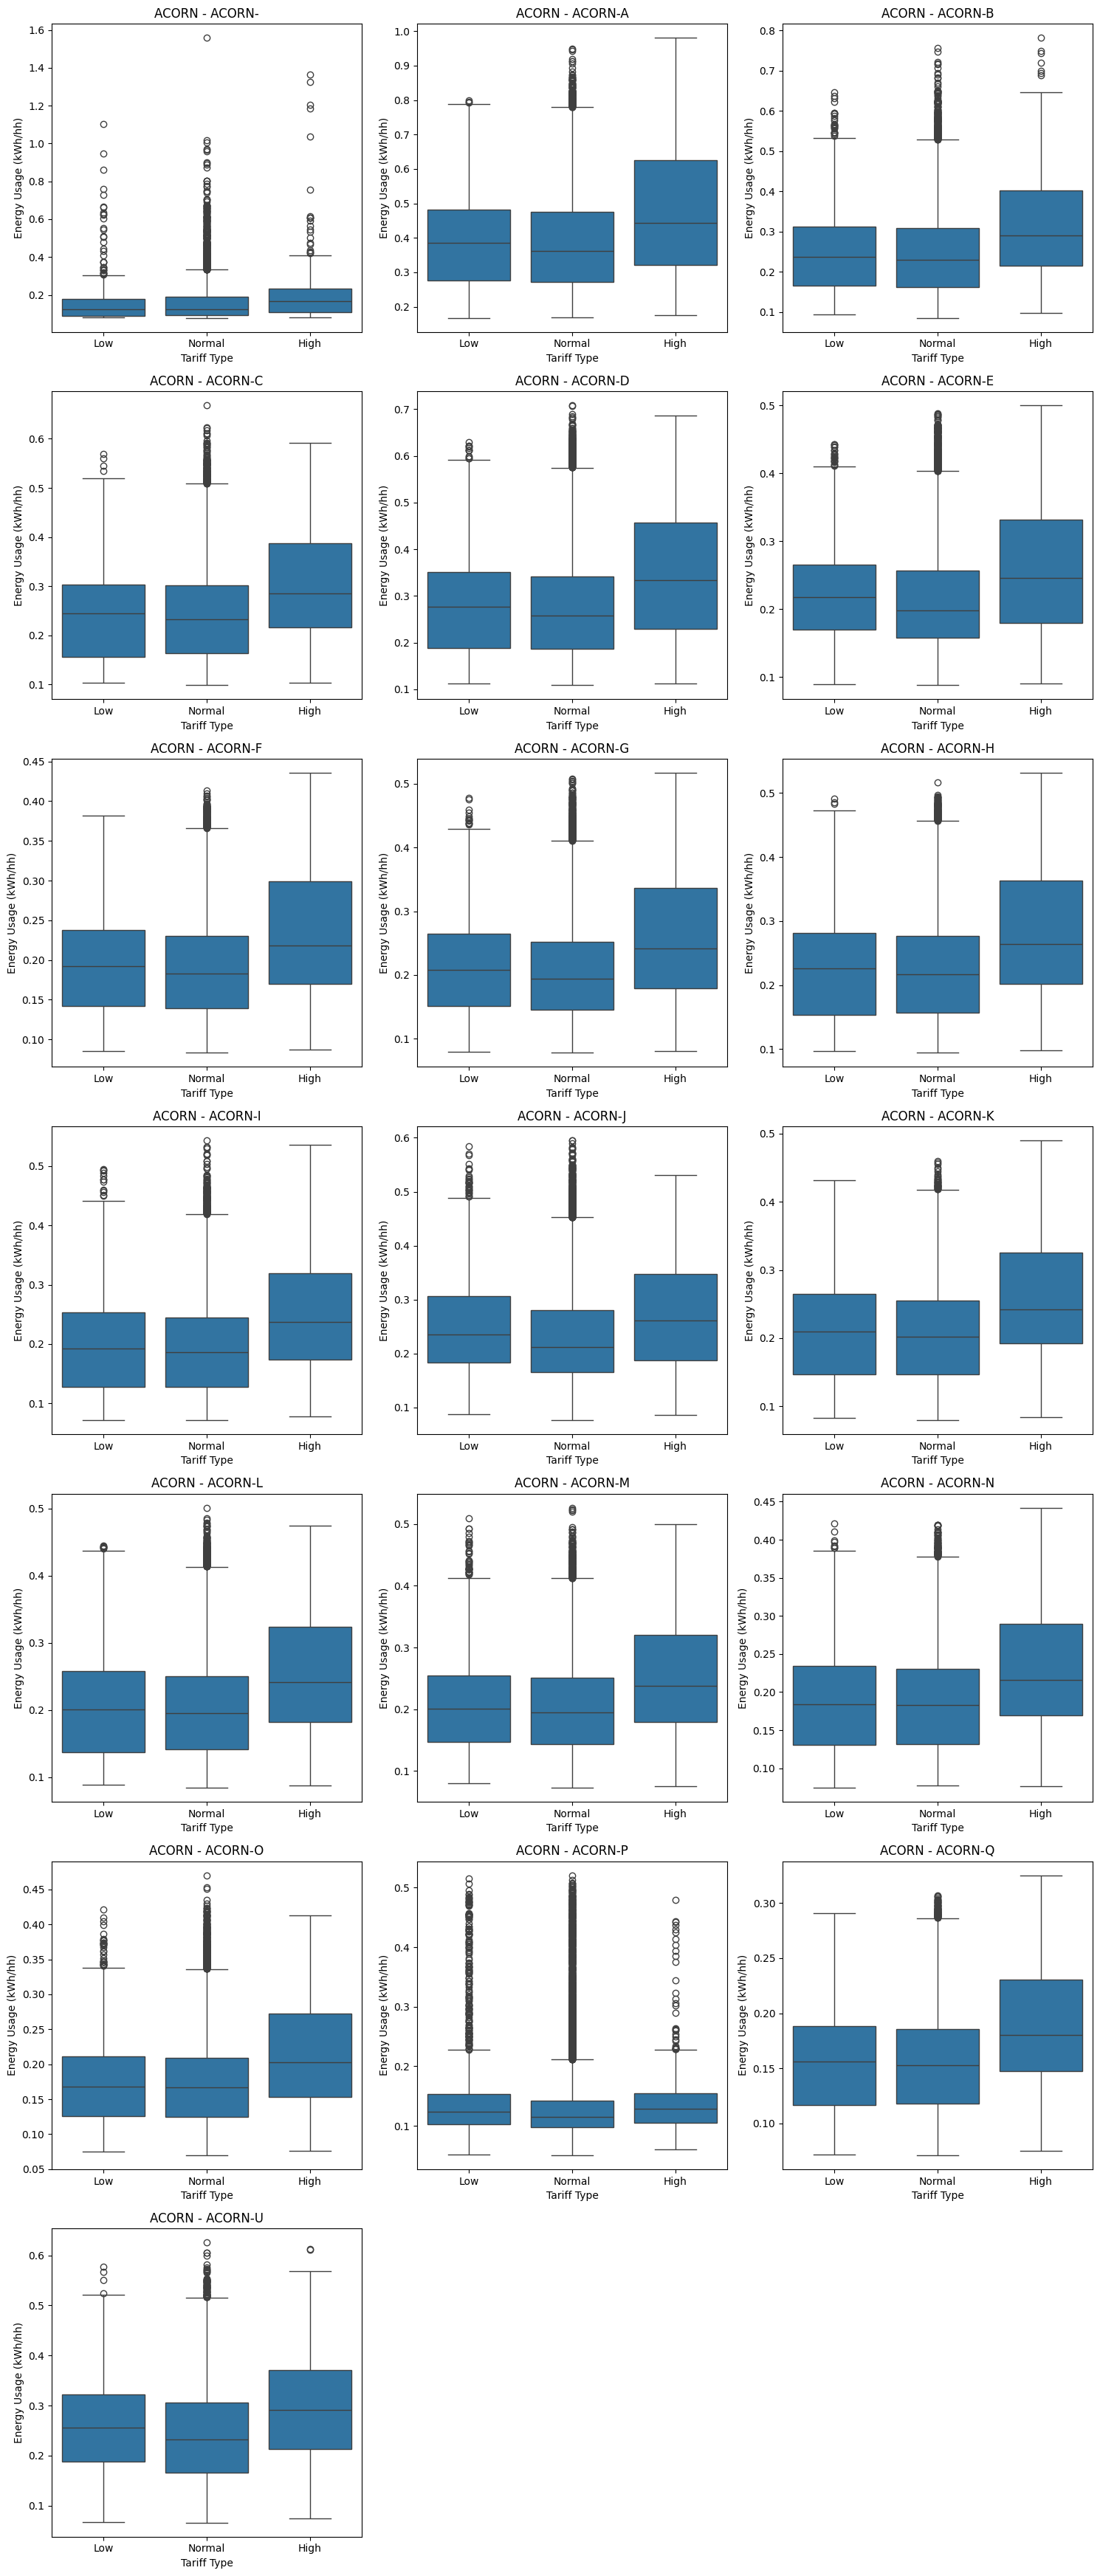

### Time Series for ACORN ###


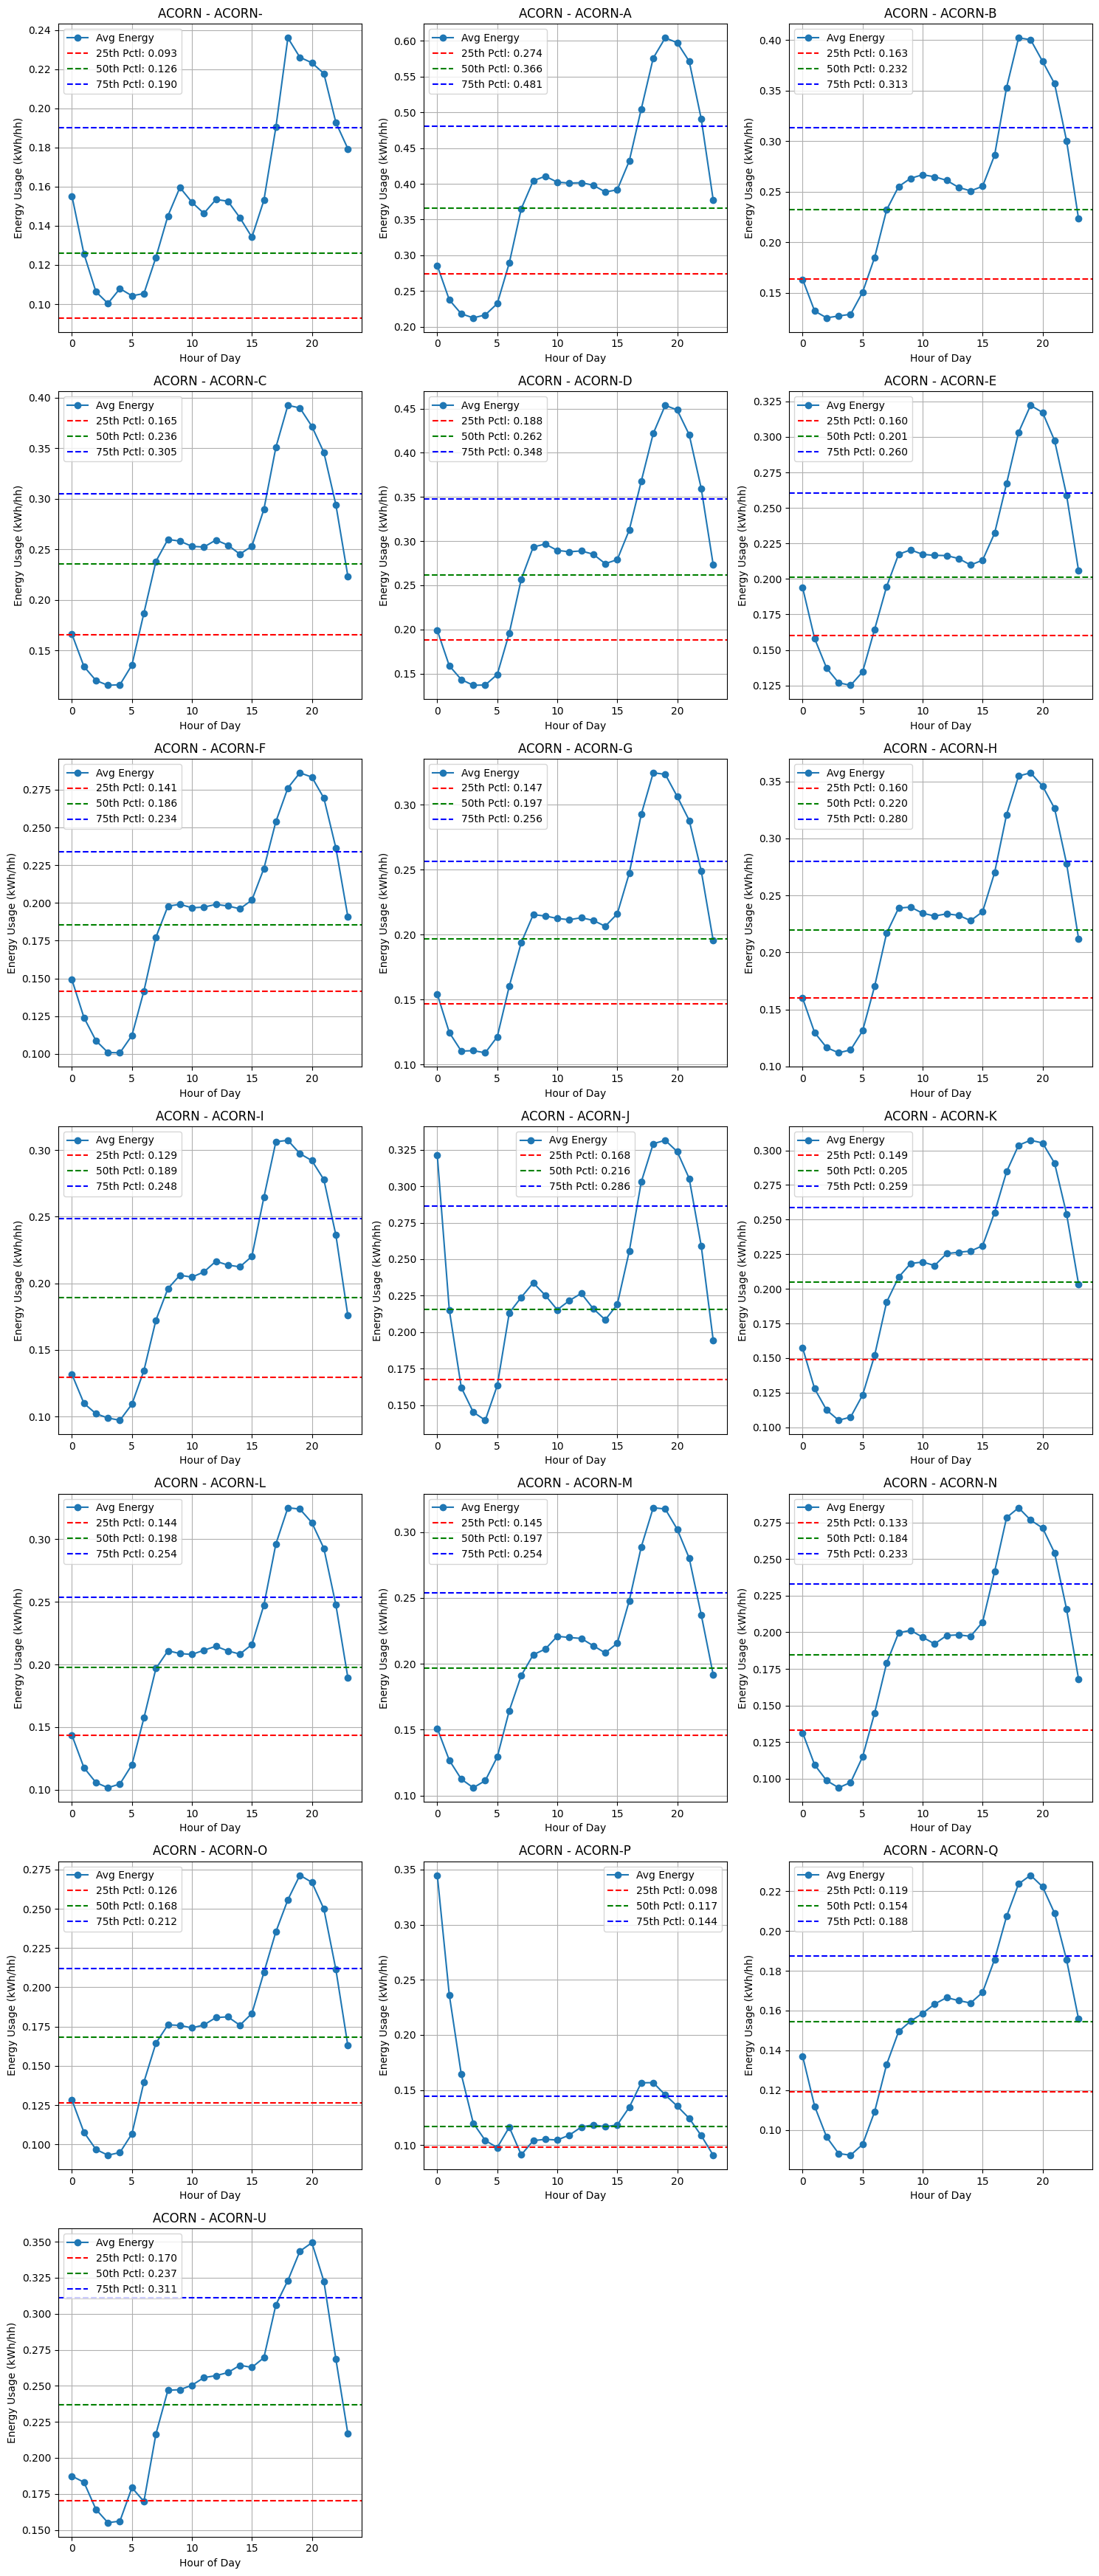

In [51]:
# --------------------------
# Plotting for ACORN
# --------------------------

print("### Boxplots for ACORN ###")
plot_boxplot_grid(merged_df2_df6_df12_acorn, acorn_cols, title_prefix="ACORN")

print("### Time Series for ACORN ###")
plot_time_series_grid(merged_df2_df6_df12_acorn, acorn_cols, title_prefix="ACORN")

In [56]:
# Compute thresholds for ACORN
ACORN_tariff_threshold = compute_tariff_thresholds(merged_df2_df6_df12_acorn, acorn_cols, title_prefix="ACORN")
ACORN_tariff_threshold.to_csv("Processed Data/7. ACORN_tariff_threshold.csv")
ACORN_tariff_threshold

,ACORN,Tariff Type,Energy Threshold
0,ACORN-,Low,0.093000
1,ACORN-,Normal,0.126000
2,ACORN-,High,0.190000
3,ACORN-A,Low,0.274363
4,ACORN-A,Normal,0.366160
5,ACORN-A,High,0.480713
6,ACORN-B,Low,0.163375
7,ACORN-B,Normal,0.232312
8,ACORN-B,High,0.313053
9,ACORN-C,Low,0.165406


### Boxplots for ACORN_grouped ###


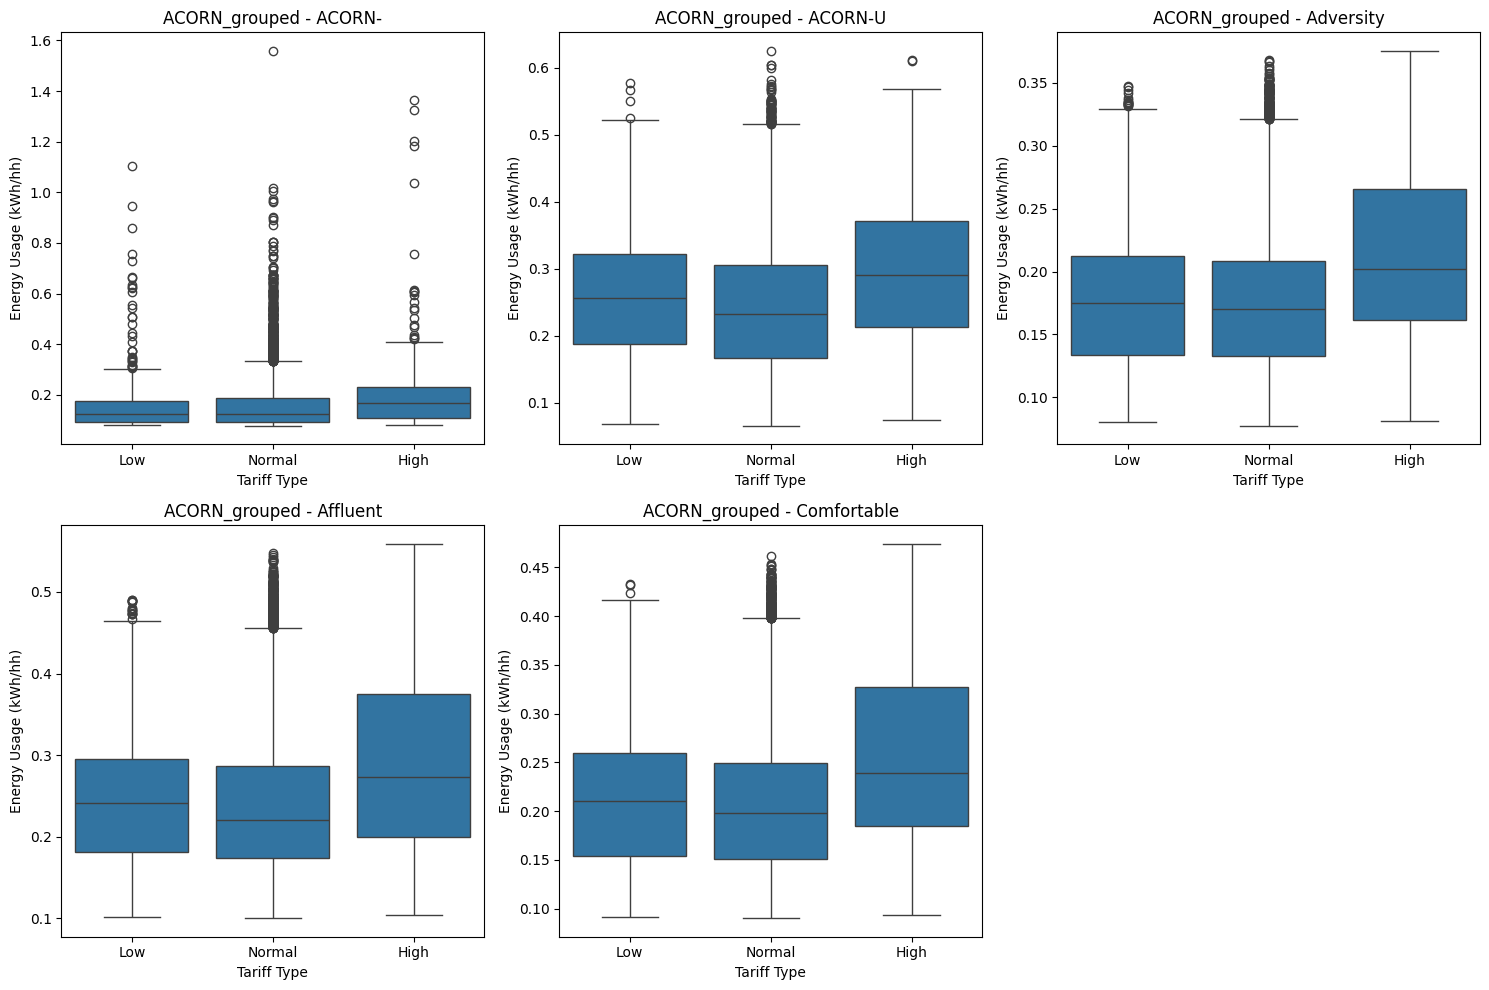

### Time Series for ACORN_grouped ###


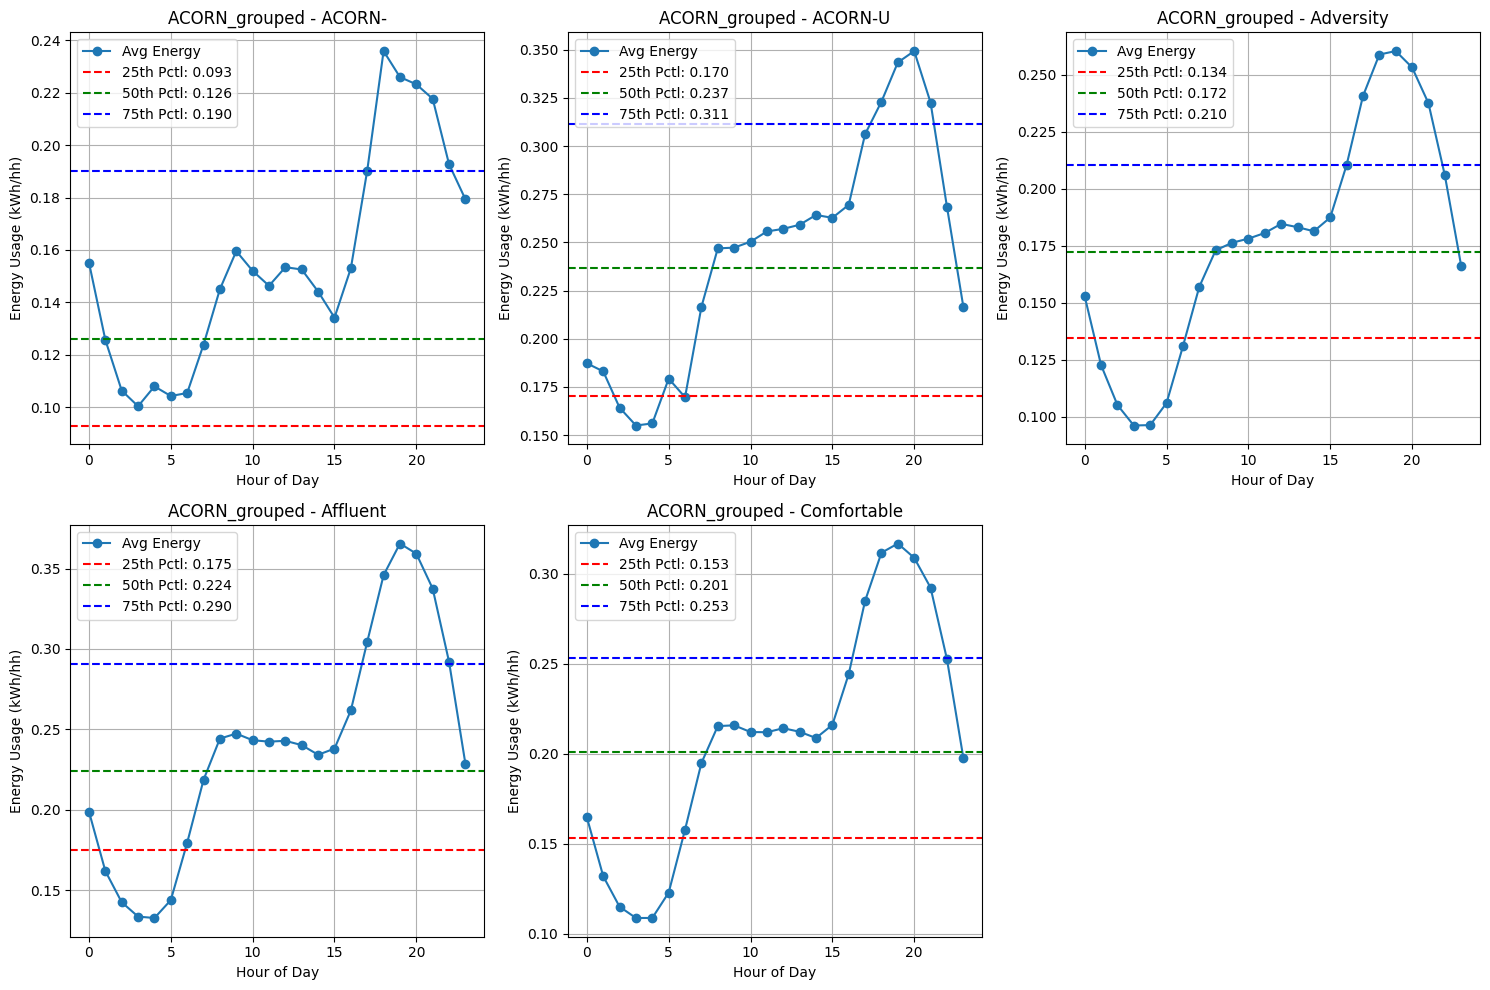

In [53]:
# --------------------------
# Plotting for ACORN_grouped
# --------------------------

print("### Boxplots for ACORN_grouped ###")
plot_boxplot_grid(merged_df2_df6_df12_acorn_grouped, acorn_grouped_cols, title_prefix="ACORN_grouped")

print("### Time Series for ACORN_grouped ###")
plot_time_series_grid(merged_df2_df6_df12_acorn_grouped, acorn_grouped_cols, title_prefix="ACORN_grouped")

In [58]:
# Compute thresholds for ACORN_grouped
ACORN_grouped_tariff_threshold = compute_tariff_thresholds(merged_df2_df6_df12_acorn_grouped, acorn_grouped_cols, title_prefix="ACORN_grouped")
ACORN_grouped_tariff_threshold.to_csv("Processed Data/8. ACORN_grouped_tariff_threshold.csv")
ACORN_grouped_tariff_threshold

,ACORN_grouped,Tariff Type,Energy Threshold
0,ACORN-,Low,0.093000
1,ACORN-,Normal,0.126000
2,ACORN-,High,0.190000
3,ACORN-U,Low,0.170104
4,ACORN-U,Normal,0.236895
5,ACORN-U,High,0.311232
6,Adversity,Low,0.134275
7,Adversity,Normal,0.172403
8,Adversity,High,0.210497
9,Affluent,Low,0.175164


---

## Load Datasets

### Processed Data

In [3]:
processed_df1 = pd.read_csv('Processed Data/1. acorn_info.csv')
processed_df1 = processed_df1[processed_df1['Acorn'] != 'ACORN-']
processed_df1.head()

,Unnamed: 0,Acorn,Total_Households,Start_Day,End_Day,Total_Days,Average_Days,Total_Energy,Average_Energy,Acorn Category,Acorn_grouped,Average_Energy_Per_Day
1,1,ACORN-A,157,2011-12-03,2014-02-28,92983,592.248408,1.774523e+06,11302.692580,Luxury Lifestyles,Affluent,19.084378
2,2,ACORN-B,25,2011-12-23,2014-02-28,14442,577.680000,1.721711e+05,6886.842400,Luxury Lifestyles,Affluent,11.921552
3,3,ACORN-C,151,2011-12-06,2014-02-28,88721,587.556291,1.059742e+06,7018.159536,Luxury Lifestyles,Affluent,11.944659
4,4,ACORN-D,292,2011-11-23,2014-02-28,188956,647.109589,2.565846e+06,8787.143359,Established Affluence,Affluent,13.579065
5,5,ACORN-E,1567,2011-11-23,2014-02-28,1021877,652.123165,1.058591e+07,6755.525971,Established Affluence,Affluent,10.359279


In [33]:
processed_df2 = pd.read_csv('Processed Data/2. acorn_grouped_info.csv')
processed_df2 = processed_df2[processed_df2['Acorn_grouped'] != 'ACORN-']
processed_df2.head()

,Unnamed: 0,Acorn_grouped,Total_Households,Start_Day,End_Day,Total_Days,Average_Days,Total_Energy,Average_Energy
1,1,ACORN-U,49,2011-12-07,2014-02-28,29584,603.755102,3.433143e+05,7006.414857
2,2,Adversity,1816,2011-11-23,2014-02-28,1134779,624.878304,9.654154e+06,5316.163885
3,3,Affluent,2192,2011-11-23,2014-02-28,1406979,641.869982,1.615819e+07,7371.437474
4,4,Comfortable,1507,2011-11-23,2014-02-28,936705,621.569343,9.374789e+06,6220.829113


In [20]:
processed_df3 = pd.read_csv('Processed Data/3. acorn_category_info.csv')
processed_df3.head()

,Unnamed: 0,Acorn Category,Total_Households,Start_Day,End_Day,Total_Days,Average_Days,Total_Energy,Average_Energy,Average_Energy_Per_Day
0,0,Established Affluence,1859,2011-11-23,2014-02-28,1210833,651.335664,1.315176e+07,7074.639622,10.861742
1,1,Low Income Living,49,2011-12-07,2014-02-28,29584,603.755102,3.433143e+05,7006.414857,11.604730
2,2,Luxury Lifestyles,333,2011-12-03,2014-02-28,196146,589.027027,3.006436e+06,9028.335991,15.327541
3,3,Steadfast Communities,875,2011-11-23,2014-02-28,529875,605.571429,5.144238e+06,5879.129010,9.708399
4,4,Stretched Society,941,2011-11-23,2014-02-28,604904,642.831031,4.509916e+06,4792.684092,7.455589


In [ ]:
processed_df4 = pd.read_csv('Processed Data/4. acorn_avg_energy_by_tariff.csv')
processed_df4.head()

,Acorn,stdorToU,Total_Energy,Total_Days,Total_Households,Average_Energy_Per_Day
0,ACORN-A,Std,1.407286e+06,70027,118,20.096332
1,ACORN-A,ToU,3.672369e+05,23057,39,15.927348
2,ACORN-B,Std,1.354900e+05,11979,21,11.310627
3,ACORN-B,ToU,3.668105e+04,2486,4,14.755050
4,ACORN-C,Std,8.542121e+05,68756,116,12.423819


In [ ]:
processed_df6 = pd.read_csv('Processed Data/5. acorn_grouped_avg_energy_by_tariff.csv')
processed_df6.head()

,Acorn_grouped,stdorToU,Total_Energy,Total_Days,Total_Households,Average_Energy_Per_Day
0,ACORN-U,Std,2.789829e+05,23629,39,11.806802
1,ACORN-U,ToU,6.433141e+04,5923,10,10.861288
2,Adversity,Std,8.149972e+06,949905,712,8.579776
3,Adversity,ToU,1.504181e+06,185434,119,8.111681
4,Affluent,Std,1.285217e+07,1091800,1228,11.771540


In [24]:
processed_df6 = pd.read_csv('Processed Data/6. acorn_category_avg_energy_by_tariff.csv')
processed_df6.head()

,Acorn Category,stdorToU,Total_Energy,Total_Days,Total_Households,Average_Energy_Per_Day
0,Established Affluence,Std,1.045518e+07,941038,1228,11.110263
1,Established Affluence,ToU,2.696575e+06,270429,339,9.971472
2,Low Income Living,Std,2.789829e+05,23629,39,11.806802
3,Low Income Living,ToU,6.433141e+04,5923,10,10.861288
4,Luxury Lifestyles,Std,2.396988e+06,150762,118,15.899152


---

## Data Visualization

### Energy Consumption by Household Demographics
Compare total energy consumption (`energy_sum`) across different `Acorn` and `Acorn_grouped` categories.

##### By `Acorn`

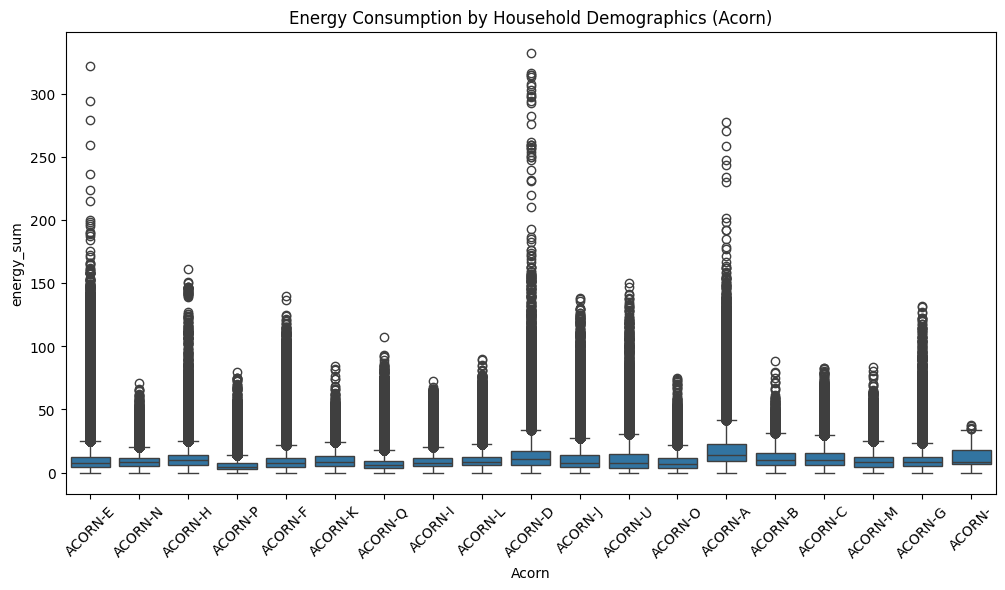

In [ ]:
# [Boxplot] Total energy consumption by Acorn category
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x="Acorn", y="energy_sum")
plt.xticks(rotation=45)
plt.title("Energy Consumption by Household Demographics (Acorn)")
plt.show()

In [13]:
# Filter out rows where 'Acorn' equals 'ACORN-'
filtered_df = merged_df[merged_df['Acorn'] != 'ACORN-']

# Sort by energy_sum in descending order and get all categories
sorted_acorn = filtered_df.groupby('Acorn')['energy_sum'].sum().sort_values(ascending=False)

# Display the sorted categories
print("Acorn Categories Sorted by Energy Consumption (Top to Bottom):")
sorted_acorn

Acorn Categories Sorted by Energy Consumption (Top to Bottom):


Acorn
ACORN-E    1.058591e+07
ACORN-F    4.110611e+06
ACORN-Q    4.032837e+06
ACORN-H    2.992531e+06
ACORN-D    2.565846e+06
ACORN-L    2.045429e+06
ACORN-A    1.774523e+06
ACORN-G    1.257513e+06
ACORN-K    1.066916e+06
ACORN-C    1.059742e+06
ACORN-N    8.479862e+05
ACORN-J    7.359013e+05
ACORN-M    6.615990e+05
ACORN-O    5.223077e+05
ACORN-P    4.770790e+05
ACORN-U    3.433143e+05
ACORN-I    2.782335e+05
ACORN-B    1.721711e+05
Name: energy_sum, dtype: float64

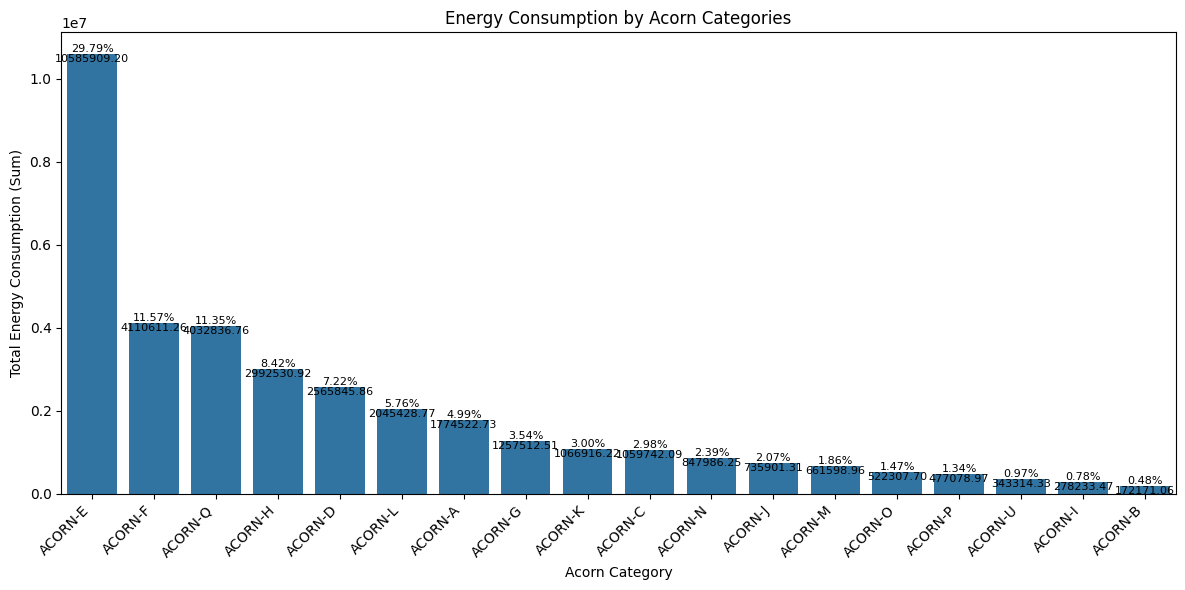

In [29]:
# Calculate the total energy consumption
total_energy_consumption = sorted_acorn.sum()

# Plot bar chart for energy consumption
plt.figure(figsize=(12, 6))  # Adjusted figure size for more space

# Plot the bar chart
sns.barplot(x=sorted_acorn.index, y=sorted_acorn.values)

# Add percentage and raw values on top and below the bars
for i, value in enumerate(sorted_acorn.values):
    percentage = (value / total_energy_consumption) * 100
    plt.text(i, value + 0.1, f'{percentage:.2f}%', ha='center', va='bottom', color='black', fontsize=8)
    plt.text(i, value - 0.1, f'{value:.2f}', ha='center', va='top', color='black', fontsize=8)

# Add title and labels
plt.title('Energy Consumption by Acorn Categories')
plt.xlabel('Acorn Category')
plt.ylabel('Total Energy Consumption (Sum)')

# Tilt x-axis labels, reduce font size and ensure they don't overlap
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()

In [60]:
processed_df1

,Unnamed: 0,Acorn,Total_Households,Start_Day,End_Day,Total_Days,Average_Days,Total_Energy,Average_Energy,Acorn Category,Acorn_grouped,Average_Energy_Per_Day
1,1,ACORN-A,157,2011-12-03,2014-02-28,92983,592.248408,1.774523e+06,11302.692580,Luxury Lifestyles,Affluent,19.084378
2,2,ACORN-B,25,2011-12-23,2014-02-28,14442,577.680000,1.721711e+05,6886.842400,Luxury Lifestyles,Affluent,11.921552
3,3,ACORN-C,151,2011-12-06,2014-02-28,88721,587.556291,1.059742e+06,7018.159536,Luxury Lifestyles,Affluent,11.944659
4,4,ACORN-D,292,2011-11-23,2014-02-28,188956,647.109589,2.565846e+06,8787.143359,Established Affluence,Affluent,13.579065
5,5,ACORN-E,1567,2011-11-23,2014-02-28,1021877,652.123165,1.058591e+07,6755.525971,Established Affluence,Affluent,10.359279
6,6,ACORN-F,684,2011-11-23,2014-02-28,447225,653.837719,4.110611e+06,6009.665583,Thriving Neighbourhoods,Comfortable,9.191372
7,7,ACORN-G,205,2011-11-23,2014-02-28,123506,602.468293,1.257513e+06,6134.207380,Thriving Neighbourhoods,Comfortable,10.181793
8,8,ACORN-H,455,2011-11-24,2014-02-28,271521,596.749451,2.992531e+06,6576.991042,Thriving Neighbourhoods,Comfortable,11.021361
9,9,ACORN-I,51,2012-01-23,2014-02-28,29638,581.137255,2.782335e+05,5455.558138,Thriving Neighbourhoods,Comfortable,9.387727
10,10,ACORN-J,112,2011-12-07,2014-02-28,64815,578.705357,7.359013e+05,6570.547437,Thriving Neighbourhoods,Comfortable,11.353874


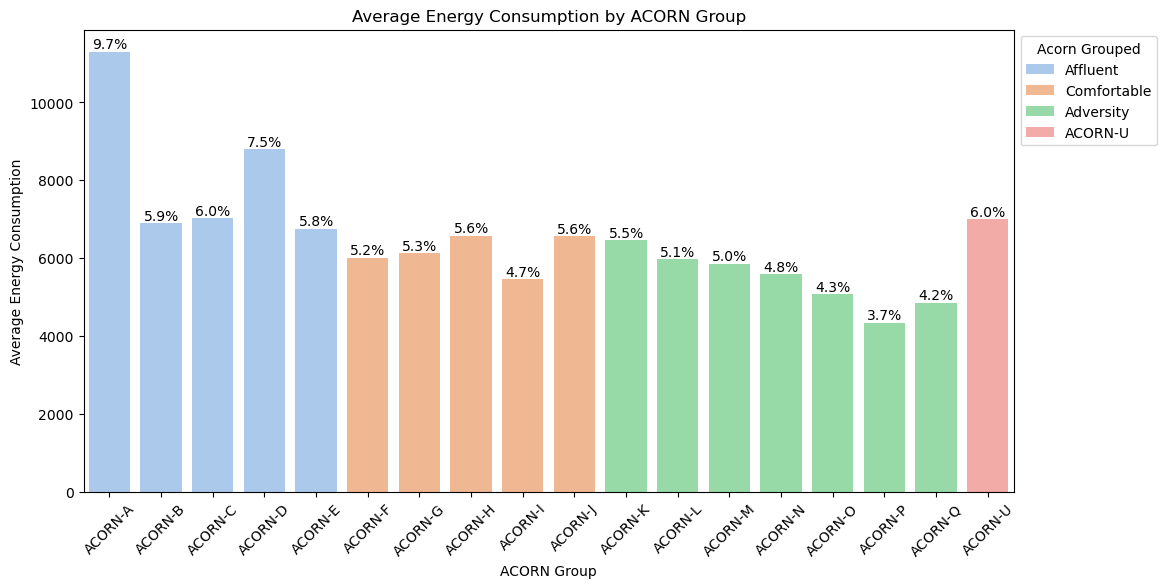

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Acorn", y="Average_Energy", data=processed_df1, palette="pastel", hue="Acorn_grouped", dodge=False)

# Calculate the total sum of the "Average_Energy" values
total_energy = processed_df1["Average_Energy"].sum()

# Add percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only add labels for bars with non-zero height
        percentage = (height / total_energy) * 100
        ax.text(p.get_x() + p.get_width() / 2, height, f'{percentage:.1f}%', 
                ha='center', va='bottom', fontsize=10)

plt.xlabel("ACORN Group")
plt.ylabel("Average Energy Consumption")
plt.title("Average Energy Consumption by ACORN Group")
plt.xticks(rotation=45)
plt.legend(title="Acorn Grouped", bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

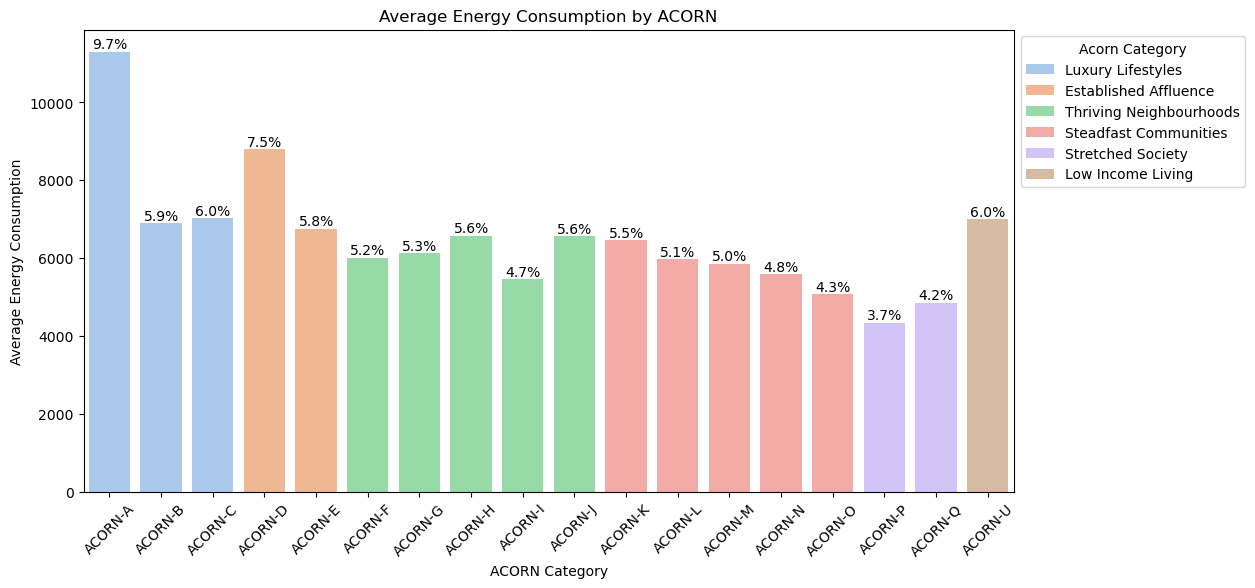

In [4]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Acorn", y="Average_Energy", data=processed_df1, palette="pastel", hue="Acorn Category", dodge=False)

# Calculate the total sum of the "Average_Energy" values
total_energy = processed_df1["Average_Energy"].sum()

# Add percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only add labels for bars with non-zero height
        percentage = (height / total_energy) * 100
        ax.text(p.get_x() + p.get_width() / 2, height, f'{percentage:.1f}%', 
                ha='center', va='bottom', fontsize=10)

plt.xlabel("ACORN Category")
plt.ylabel("Average Energy Consumption")
plt.title("Average Energy Consumption by ACORN")
plt.xticks(rotation=45)
plt.legend(title="Acorn Category", bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

/var/folders/qf/cb8mfdbx0f18hx0lw712nq2w0000gn/T/ipykernel_43408/271455141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['day'] = pd.to_datetime(filtered_df['day'], errors='coerce')


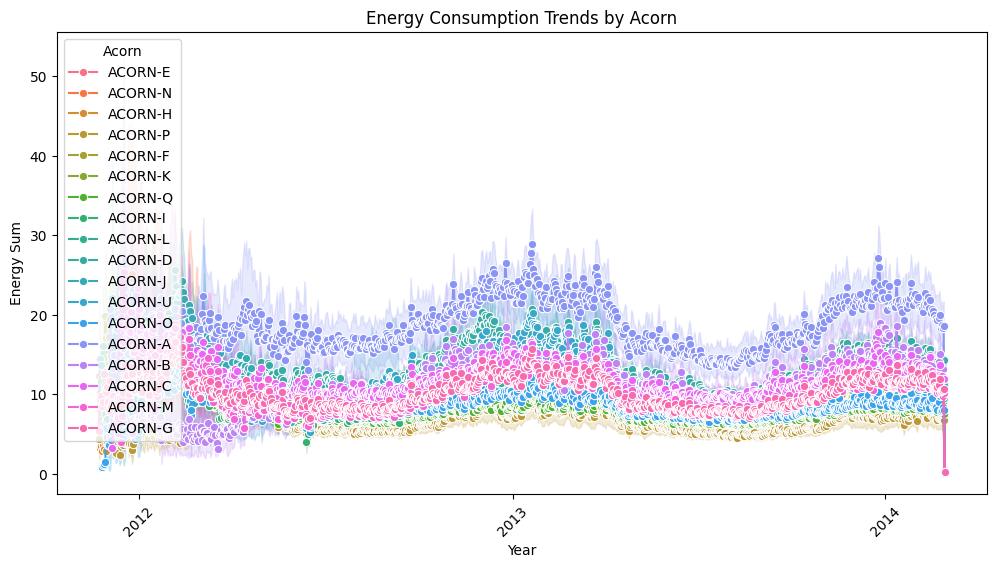

In [30]:
# Ensure 'day' is a datetime object
filtered_df['day'] = pd.to_datetime(filtered_df['day'], errors='coerce')

# Set figure size
plt.figure(figsize=(12, 6))

# Plot each Acorn separately
sns.lineplot(data=filtered_df, x='day', y='energy_sum', hue='Acorn', marker='o')

# Labels and title
plt.xlabel("Year")
plt.ylabel("Energy Sum")
plt.title("Energy Consumption Trends by Acorn")

# Format x-axis to show only the year (e.g., 2011, 2012, etc.)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to every year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as "YYYY"

# Rotate labels for better readability
plt.xticks(rotation=45)

plt.legend(title="Acorn")

plt.show()

##### By `Acorn_grouped`

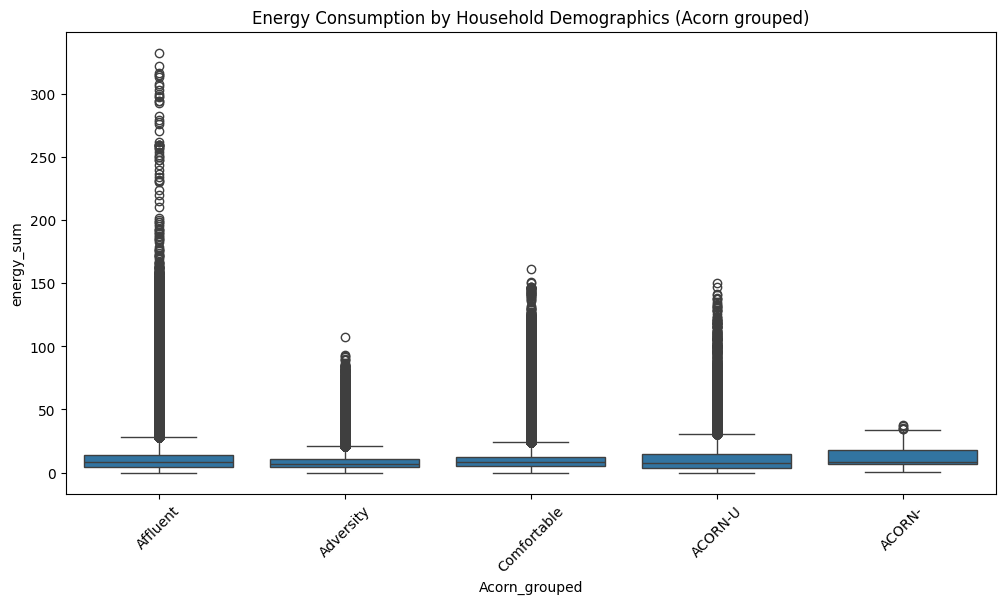

In [32]:
# [Boxplot] Energy consumption by Acorn_grouped
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x="Acorn_grouped", y="energy_sum")
plt.xticks(rotation=45)
plt.title("Energy Consumption by Household Demographics (Acorn grouped)")
plt.show()

In [33]:
# Sort by energy_sum in descending order and get all groups
sorted_acorn_grouped = filtered_df.groupby('Acorn_grouped')['energy_sum'].sum().sort_values(ascending=False)

# Display the sorted grouped
print("Acorn grouped Sorted by Energy Consumption (Top to Bottom):")
sorted_acorn_grouped

Acorn grouped Sorted by Energy Consumption (Top to Bottom):


Acorn_grouped
Affluent      16,158,190.94
Adversity      9,654,153.61
Comfortable    9,374,789.47
ACORN-U          343,314.33
Name: energy_sum, dtype: float64

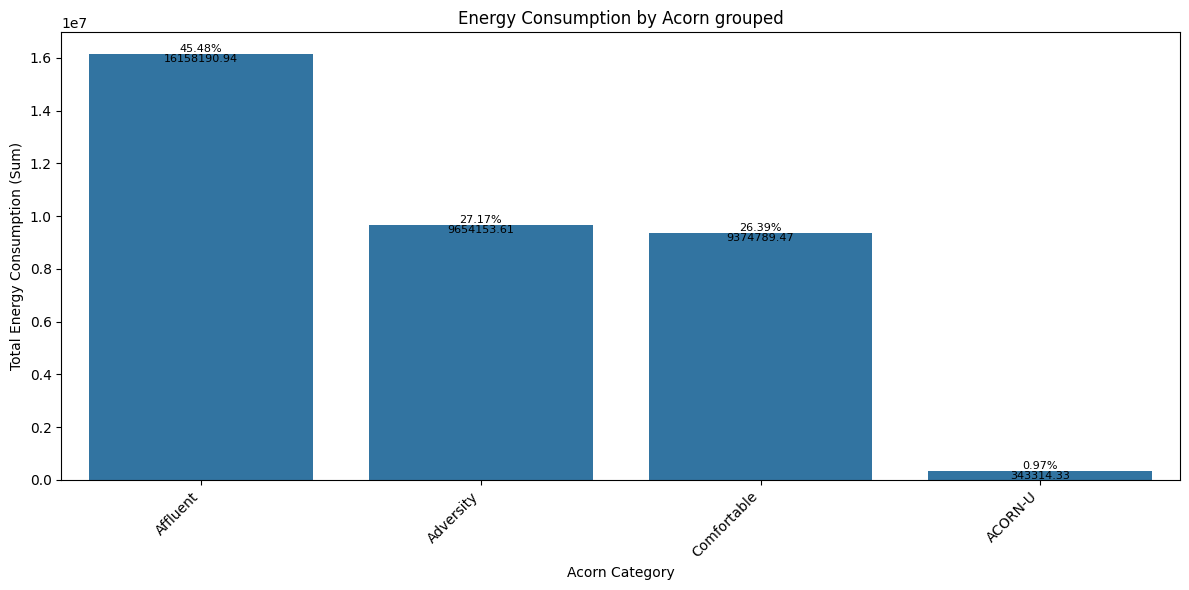

In [34]:
# Calculate the total energy consumption
total_energy_consumption = sorted_acorn_grouped.sum()

# Plot bar chart for energy consumption
plt.figure(figsize=(12, 6))  # Adjusted figure size for more space

# Plot the bar chart
sns.barplot(x=sorted_acorn_grouped.index, y=sorted_acorn_grouped.values)

# Add percentage and raw values on top and below the bars
for i, value in enumerate(sorted_acorn_grouped.values):
    percentage = (value / total_energy_consumption) * 100
    plt.text(i, value + 0.1, f'{percentage:.2f}%', ha='center', va='bottom', color='black', fontsize=8)
    plt.text(i, value - 0.1, f'{value:.2f}', ha='center', va='top', color='black', fontsize=8)

# Add title and labels
plt.title('Energy Consumption by Acorn grouped')
plt.xlabel('Acorn Category')
plt.ylabel('Total Energy Consumption (Sum)')

# Tilt x-axis labels, reduce font size and ensure they don't overlap
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()

/var/folders/qf/cb8mfdbx0f18hx0lw712nq2w0000gn/T/ipykernel_43408/292300803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['day'] = pd.to_datetime(filtered_df['day'], errors='coerce')


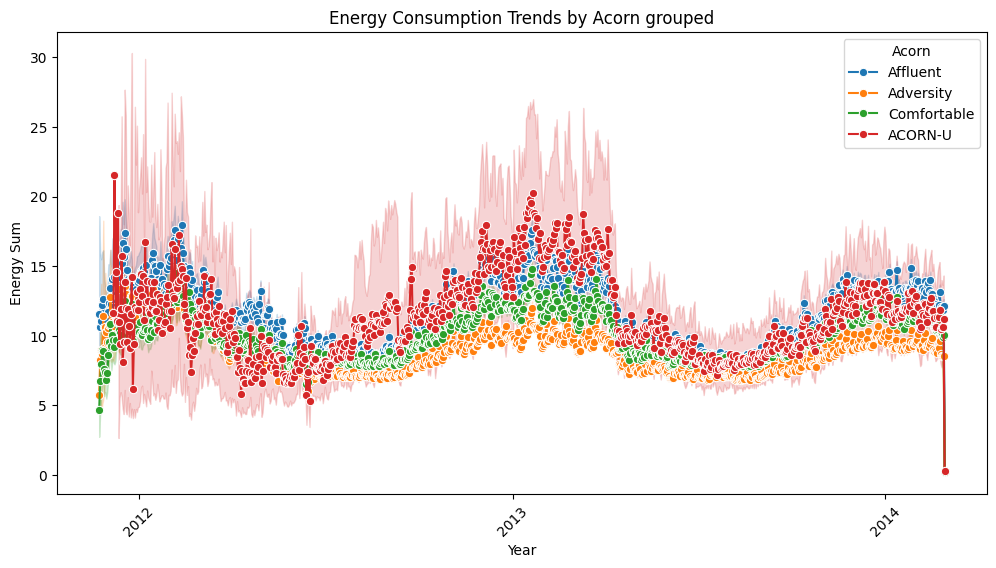

In [35]:
# Ensure 'day' is a datetime object
filtered_df['day'] = pd.to_datetime(filtered_df['day'], errors='coerce')

# Set figure size
plt.figure(figsize=(12, 6))

# Plot each Acorn separately
sns.lineplot(data=filtered_df, x='day', y='energy_sum', hue='Acorn_grouped', marker='o')

# Labels and title
plt.xlabel("Year")
plt.ylabel("Energy Sum")
plt.title("Energy Consumption Trends by Acorn grouped")

# Format x-axis to show only the year (e.g., 2011, 2012, etc.)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to every year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as "YYYY"

# Rotate labels for better readability
plt.xticks(rotation=45)

plt.legend(title="Acorn")

plt.show()

##### By `Acorn Category`

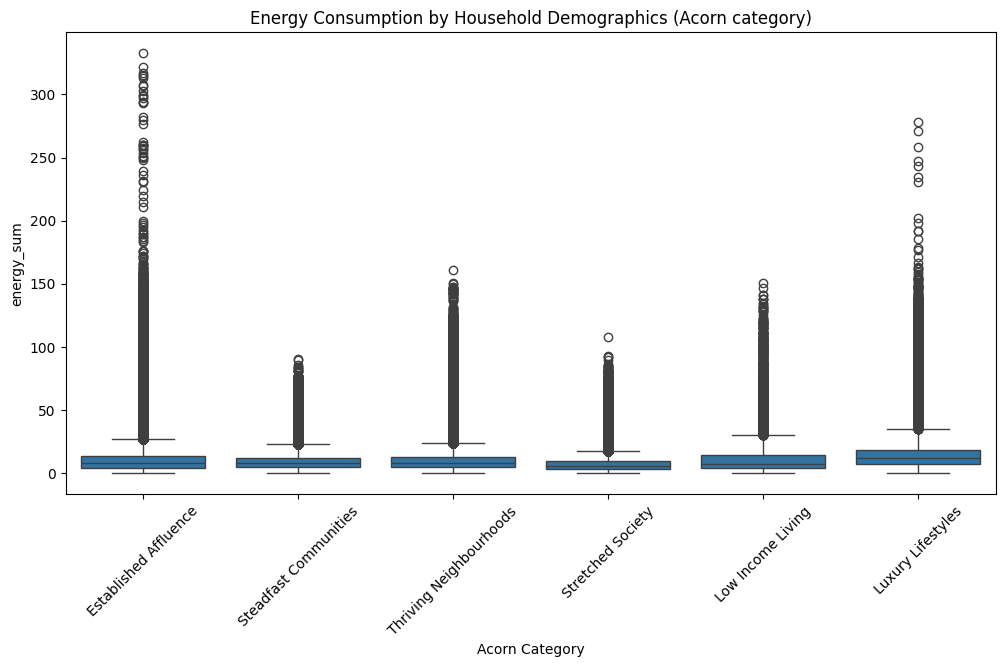

In [36]:
# [Boxplot] Energy consumption by Acorn category
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x="Acorn Category", y="energy_sum")
plt.xticks(rotation=45)
plt.title("Energy Consumption by Household Demographics (Acorn category)")
plt.show()

In [37]:
# Sort by energy_sum in descending order and get all groups
sorted_acorn_category = filtered_df.groupby('Acorn Category')['energy_sum'].sum().sort_values(ascending=False)

# Display the sorted category
print("Acorn category Sorted by Energy Consumption (Top to Bottom):")
sorted_acorn_category

Acorn category Sorted by Energy Consumption (Top to Bottom):


Acorn Category
Established Affluence     13,151,755.06
Thriving Neighbourhoods    9,374,789.47
Steadfast Communities      5,144,237.88
Stretched Society          4,509,915.73
Luxury Lifestyles          3,006,435.88
Low Income Living            343,314.33
Name: energy_sum, dtype: float64

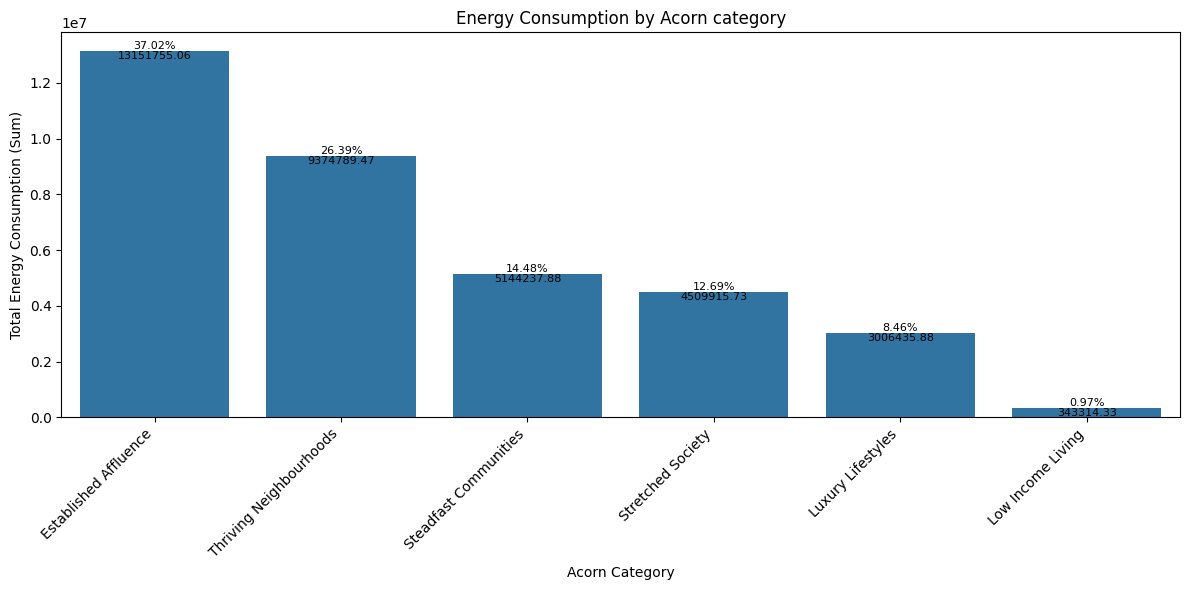

In [38]:
# Calculate the total energy consumption
total_energy_consumption = sorted_acorn_category.sum()

# Plot bar chart for energy consumption
plt.figure(figsize=(12, 6))  # Adjusted figure size for more space

# Plot the bar chart
sns.barplot(x=sorted_acorn_category.index, y=sorted_acorn_category.values)

# Add percentage and raw values on top and below the bars
for i, value in enumerate(sorted_acorn_category.values):
    percentage = (value / total_energy_consumption) * 100
    plt.text(i, value + 0.1, f'{percentage:.2f}%', ha='center', va='bottom', color='black', fontsize=8)
    plt.text(i, value - 0.1, f'{value:.2f}', ha='center', va='top', color='black', fontsize=8)

# Add title and labels
plt.title('Energy Consumption by Acorn category')
plt.xlabel('Acorn Category')
plt.ylabel('Total Energy Consumption (Sum)')

# Tilt x-axis labels, reduce font size and ensure they don't overlap
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()

/var/folders/b_/6l6rrpzs5yqd2b5_sl147sq40000gn/T/ipykernel_76894/1356483177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['day'] = pd.to_datetime(filtered_df['day'], errors='coerce')


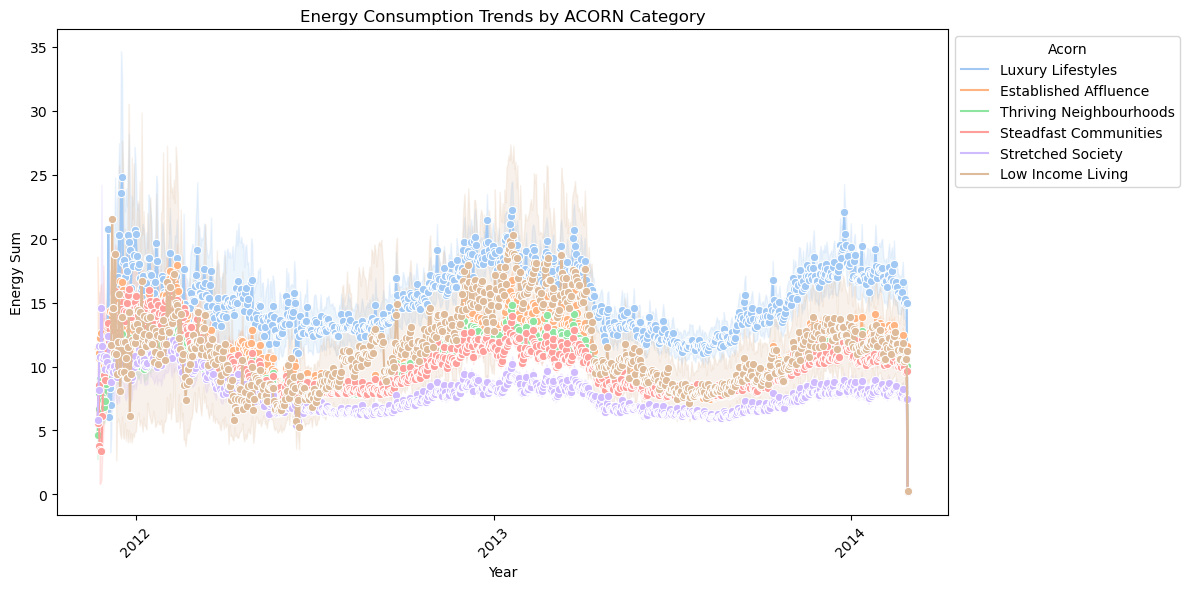

In [14]:
# Ensure 'day' is a datetime object
filtered_df['day'] = pd.to_datetime(filtered_df['day'], errors='coerce')

# Set figure size
plt.figure(figsize=(12, 6))

# Plot each Acorn separately with pastel colors
sns.lineplot(data=filtered_df, x='day', y='energy_sum', hue='Acorn Category', marker='o', palette='pastel')

# Labels and title
plt.xlabel("Year")
plt.ylabel("Energy Sum")
plt.title("Energy Consumption Trends by ACORN Category")

# Format x-axis to show only the year
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to every year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as "YYYY"

# Rotate labels for better readability
plt.xticks(rotation=45)

# Move legend outside
plt.legend(title="Acorn", bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

/var/folders/b_/6l6rrpzs5yqd2b5_sl147sq40000gn/T/ipykernel_1494/636751149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['day'] = pd.to_datetime(filtered_df['day'], errors='coerce')


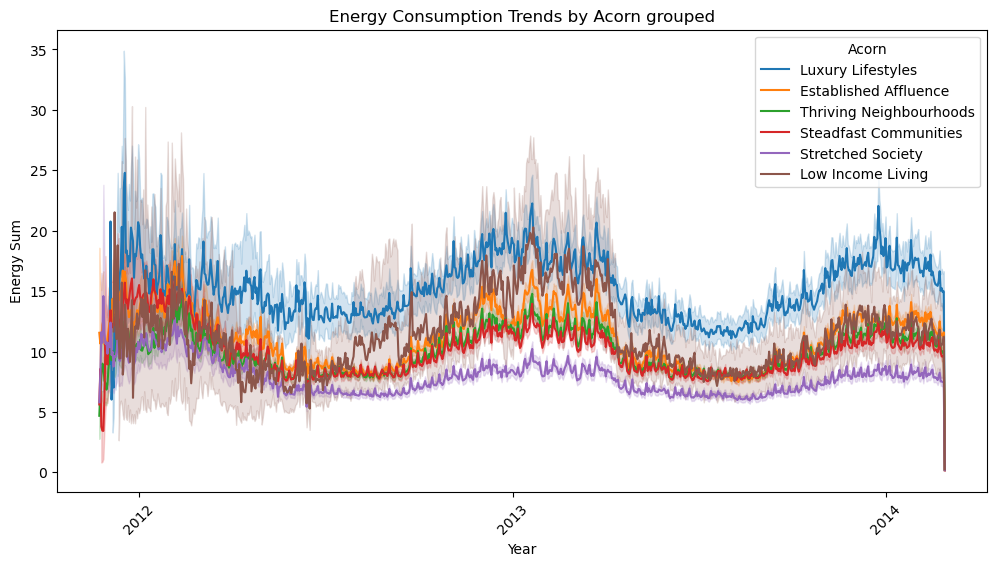

In [168]:
# Ensure 'day' is a datetime object
filtered_df['day'] = pd.to_datetime(filtered_df['day'], errors='coerce')

# Set figure size
plt.figure(figsize=(12, 6))

# Plot each Acorn separately as a line plot (no scatter points)
sns.lineplot(data=filtered_df, x='day', y='energy_sum', hue='Acorn Category')

# Labels and title
plt.xlabel("Year")
plt.ylabel("Energy Sum")
plt.title("Energy Consumption Trends by Acorn grouped")

# Format x-axis to show only the year (e.g., 2011, 2012, etc.)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to every year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as "YYYY"

# Rotate labels for better readability
plt.xticks(rotation=45)

plt.legend(title="Acorn")

plt.show()

---

### Effects of Tariffs on Energy Consumption
Compare `energy_sum` under Standard (Std) vs Time-of-Use (ToU) tariffs.

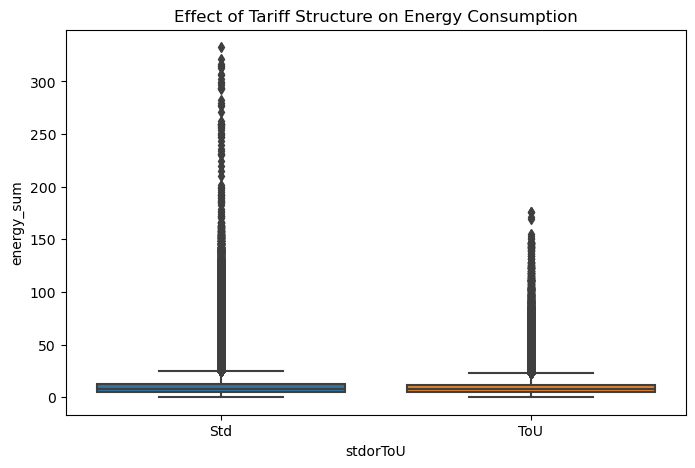

In [95]:
# [Boxplot] Energy consumption by tariff structures
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x="stdorToU", y="energy_sum")
plt.title("Effect of Tariff Structure on Energy Consumption")
plt.show()

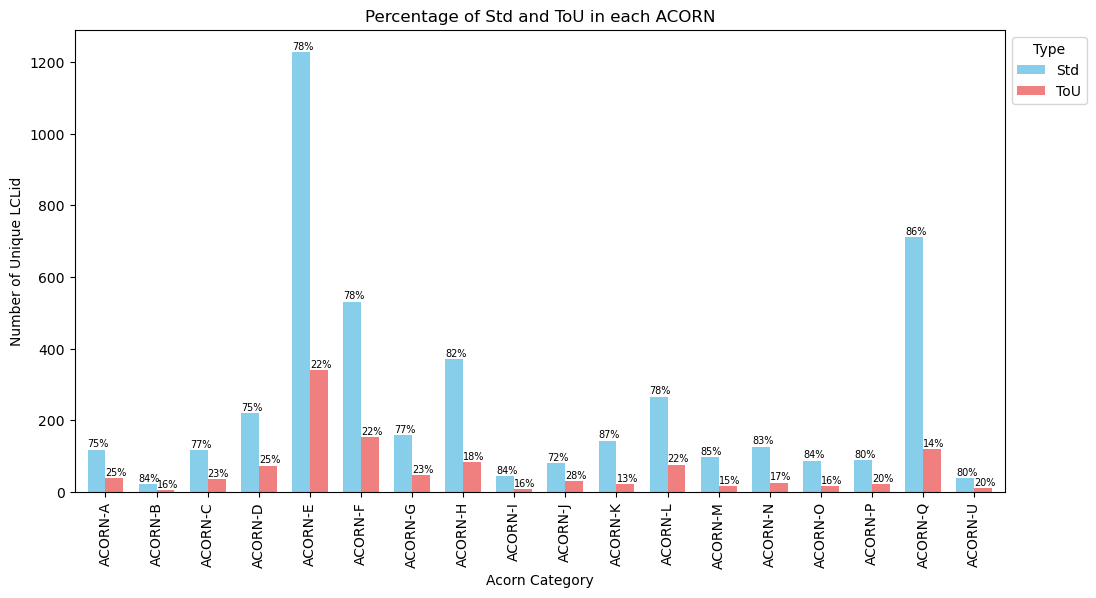

In [11]:
# Filter out rows where 'Acorn' is 'ACORN-'
merged_df_filtered = merged_df[merged_df['Acorn'] != 'ACORN-']

# Create a new DataFrame to count unique 'LCLid' for 'Std' and 'ToU' in each 'Acorn' type
acorn_counts = merged_df_filtered.groupby(['Acorn', 'stdorToU'])['LCLid'].nunique().unstack(fill_value=0)

# Compute percentage for each category within each 'Acorn' group
acorn_percentages = acorn_counts.div(acorn_counts.sum(axis=1), axis=0) * 100

# Plot the side-by-side bar chart
ax = acorn_counts.plot(kind='bar', stacked=False, figsize=(12, 6), color=['skyblue', 'lightcoral'], width=0.7)

# Adding percentage labels to each bar
for i, (index, row) in enumerate(acorn_counts.iterrows()):
    total = row.sum()
    for j, (cat, count) in enumerate(row.items()):
        percentage = acorn_percentages.loc[index, cat]
        if count > 0:  # Only add labels to non-zero values
            # Calculate x-position for each bar
            x_position = i + (j - 0.4) * 0.35  # Shift the label to the center of each bar
            ax.text(x_position, count + 2, f'{percentage:.0f}%', ha='center', va='bottom', color='black', fontsize=7)

# Adding labels and title
plt.xlabel('Acorn Category')
plt.ylabel('Number of Unique LCLid')
plt.title('Percentage of Std and ToU in each ACORN')

# Adding legend to indicate the categories outside the chart
plt.legend(title='Type', labels=['Std', 'ToU'], bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.show()

/var/folders/qf/cb8mfdbx0f18hx0lw712nq2w0000gn/T/ipykernel_43408/2868168531.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=acorn_merged_df, x='Acorn', y='Average_Energy_Per_Day_by_tariff', hue='stdorToU', palette='Set1', ci=None)


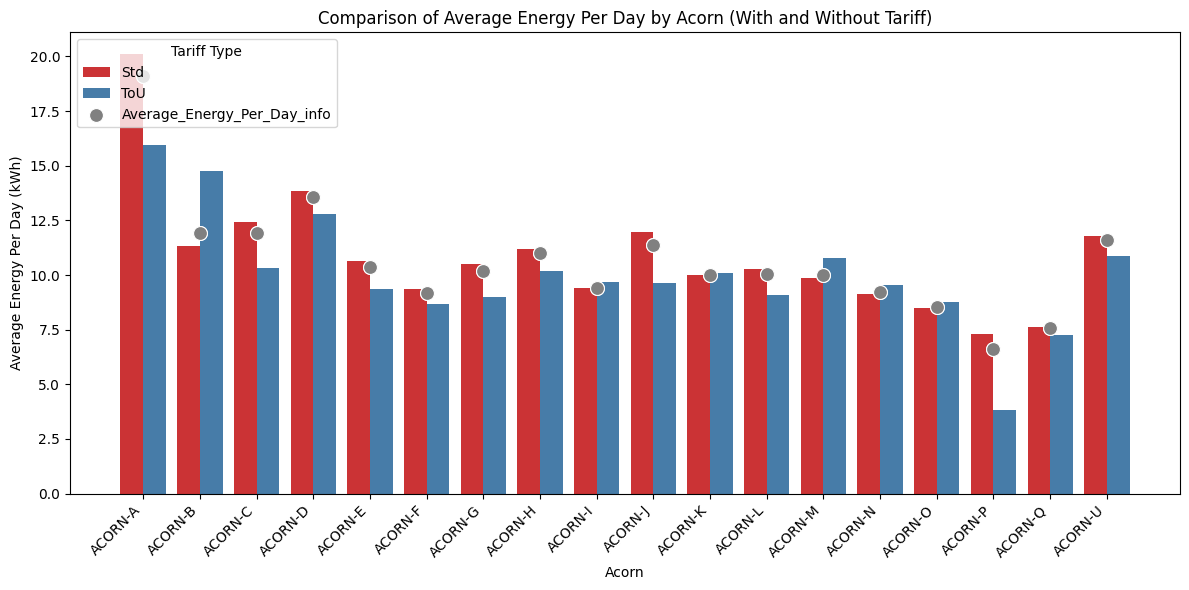

In [ ]:
# Merge the two dataframes on 'Acorn'
acorn_merged_df = pd.merge(acorn_info, acorn_avg_energy_by_tariff, 
                     on='Acorn', how='inner', suffixes=('_info', '_by_tariff'))

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot for 'Average_Energy_Per_Day_by_tariff' for Std and ToU
sns.barplot(data=acorn_merged_df, x='Acorn', y='Average_Energy_Per_Day_by_tariff', hue='stdorToU', palette='Set1', ci=None)

# Plot for 'Average_Energy_Per_Day_info' without tariff distinction
sns.scatterplot(data=acorn_merged_df, x='Acorn', y='Average_Energy_Per_Day_info', color='gray', s=100, label='Average_Energy_Per_Day_info')

# Customize the plot
plt.title('Comparison of Average Energy Per Day by Acorn (With and Without Tariff)')
plt.xlabel('Acorn')
plt.ylabel('Average Energy Per Day (kWh)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tariff Type', loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

/var/folders/qf/cb8mfdbx0f18hx0lw712nq2w0000gn/T/ipykernel_43408/4213656739.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=acorn_grouped_merged_df, x='Acorn_grouped', y='Average_Energy_Per_Day_by_tariff', hue='stdorToU', palette='Set1', ci=None)


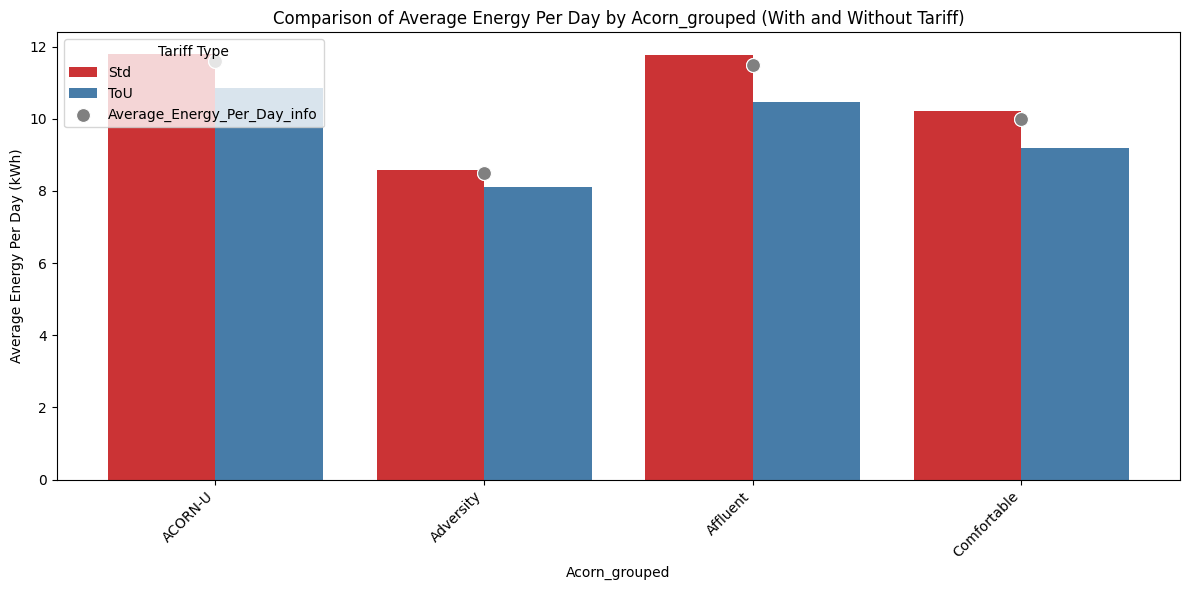

In [43]:
# Merge the two dataframes on 'Acorn_grouped'
acorn_grouped_merged_df = pd.merge(acorn_grouped_info, acorn_grouped_avg_energy_by_tariff, 
                     on='Acorn_grouped', how='inner', suffixes=('_info', '_by_tariff'))

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot for 'Average_Energy_Per_Day_by_tariff' for Std and ToU
sns.barplot(data=acorn_grouped_merged_df, x='Acorn_grouped', y='Average_Energy_Per_Day_by_tariff', hue='stdorToU', palette='Set1', ci=None)

# Plot for 'Average_Energy_Per_Day_info' without tariff distinction
sns.scatterplot(data=acorn_grouped_merged_df, x='Acorn_grouped', y='Average_Energy_Per_Day_info', color='gray', s=100, label='Average_Energy_Per_Day_info')

# Customize the plot
plt.title('Comparison of Average Energy Per Day by Acorn_grouped (With and Without Tariff)')
plt.xlabel('Acorn_grouped')
plt.ylabel('Average Energy Per Day (kWh)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tariff Type', loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


/var/folders/qf/cb8mfdbx0f18hx0lw712nq2w0000gn/T/ipykernel_43408/2490127344.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=acorn_category_merged_df, x='Acorn Category', y='Average_Energy_Per_Day_by_tariff', hue='stdorToU', palette='Set1', ci=None)


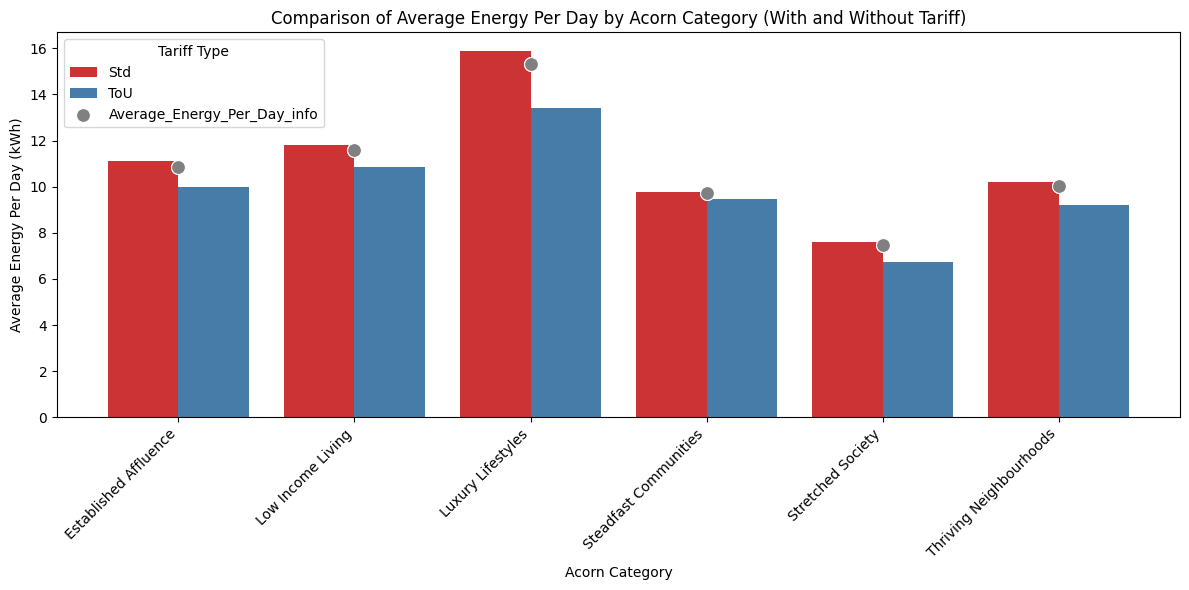

In [44]:
# Merge the two dataframes on 'Acorn Category'
acorn_category_merged_df = pd.merge(acorn_category_info, acorn_category_avg_energy_by_tariff, 
                     on='Acorn Category', how='inner', suffixes=('_info', '_by_tariff'))

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot for 'Average_Energy_Per_Day_by_tariff' for Std and ToU
sns.barplot(data=acorn_category_merged_df, x='Acorn Category', y='Average_Energy_Per_Day_by_tariff', hue='stdorToU', palette='Set1', ci=None)

# Plot for 'Average_Energy_Per_Day_info' without tariff distinction
sns.scatterplot(data=acorn_category_merged_df, x='Acorn Category', y='Average_Energy_Per_Day_info', color='gray', s=100, label='Average_Energy_Per_Day_info')

# Customize the plot
plt.title('Comparison of Average Energy Per Day by Acorn Category (With and Without Tariff)')
plt.xlabel('Acorn Category')
plt.ylabel('Average Energy Per Day (kWh)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tariff Type', loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()
